# Predict Diabetes From Medical Records- Neural Network model investigation


Dataset
- Several medical features given with the output of whether patient is diabetic or not.  
Objective
- Compare performance of an artificial neural network (ANN) to other supervised classification models to predict diabetic or not 

Reference – Kaggle: https://www.kaggle.com/code/paultimothymooney/predict-diabetes-from-medical-records/input?select=diabetes.csv

Dataset

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: assess the genetic predisposition of an individual to diabetes based on their family history of disease.
- Age: Age (years)
- Outcome - Class variable (0 or 1,non-diabetic or diabetic)

# 1 Import libraries

In [299]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import keras
import warnings

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
from keras.callbacks import EarlyStopping
# serialise to make computer readable file 
import pickle
import joblib

# 2 Exploratory Data Analysis
# 2.1 Initial exploration

In [300]:
## load the dataset
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [301]:
## looking into the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [302]:
# check for duplicate rows
duplic_check = dataset.drop_duplicates()
duplic_check.info()
# same row number as main data set - no duplicates 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [303]:
## view some statistical details
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [304]:
## counting the number of diabetic and non diabetic from the dataset
dataset['Outcome'].value_counts()

# approx 2:1 data no diabetes: with diabetes

Outcome
0    500
1    268
Name: count, dtype: int64

# 2.2 Data Cleaning 
# 2.2.1 making illogical 0 values null

In [ ]:
## data cleaning. Medical data shouldn't have 0 value

dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

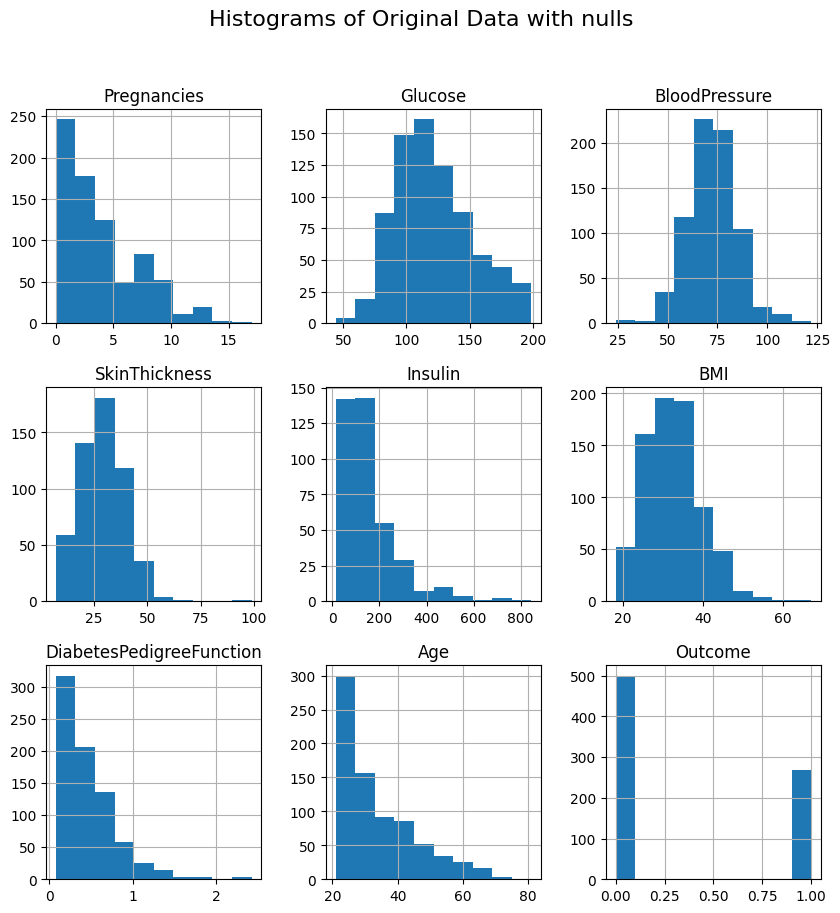

In [306]:
## histogram
dataset.hist(bins= 10, figsize=(10,10))
plt.suptitle('Histograms of Original Data with nulls', fontsize=16)
plt.show()

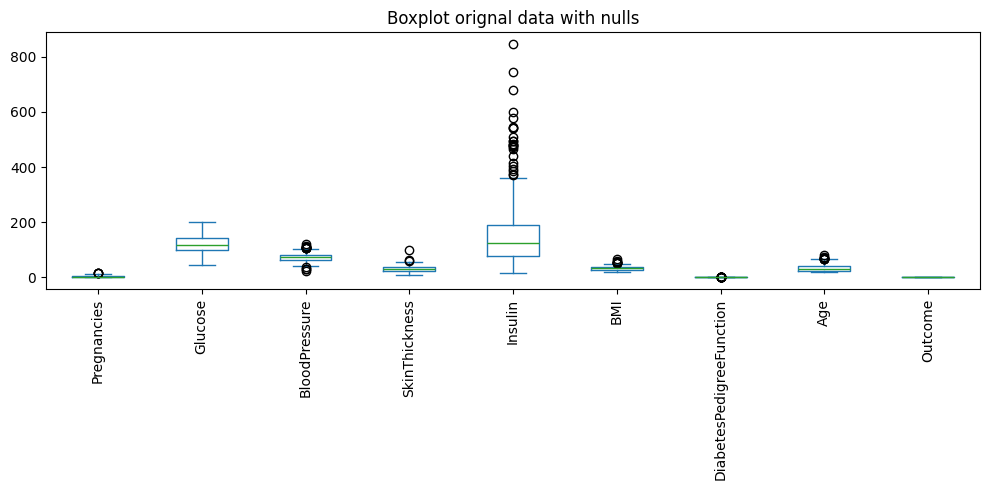

In [307]:
#  boxplot
dataset.plot(kind='box',title="Boxplot orignal data with nulls",figsize=(10, 5))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

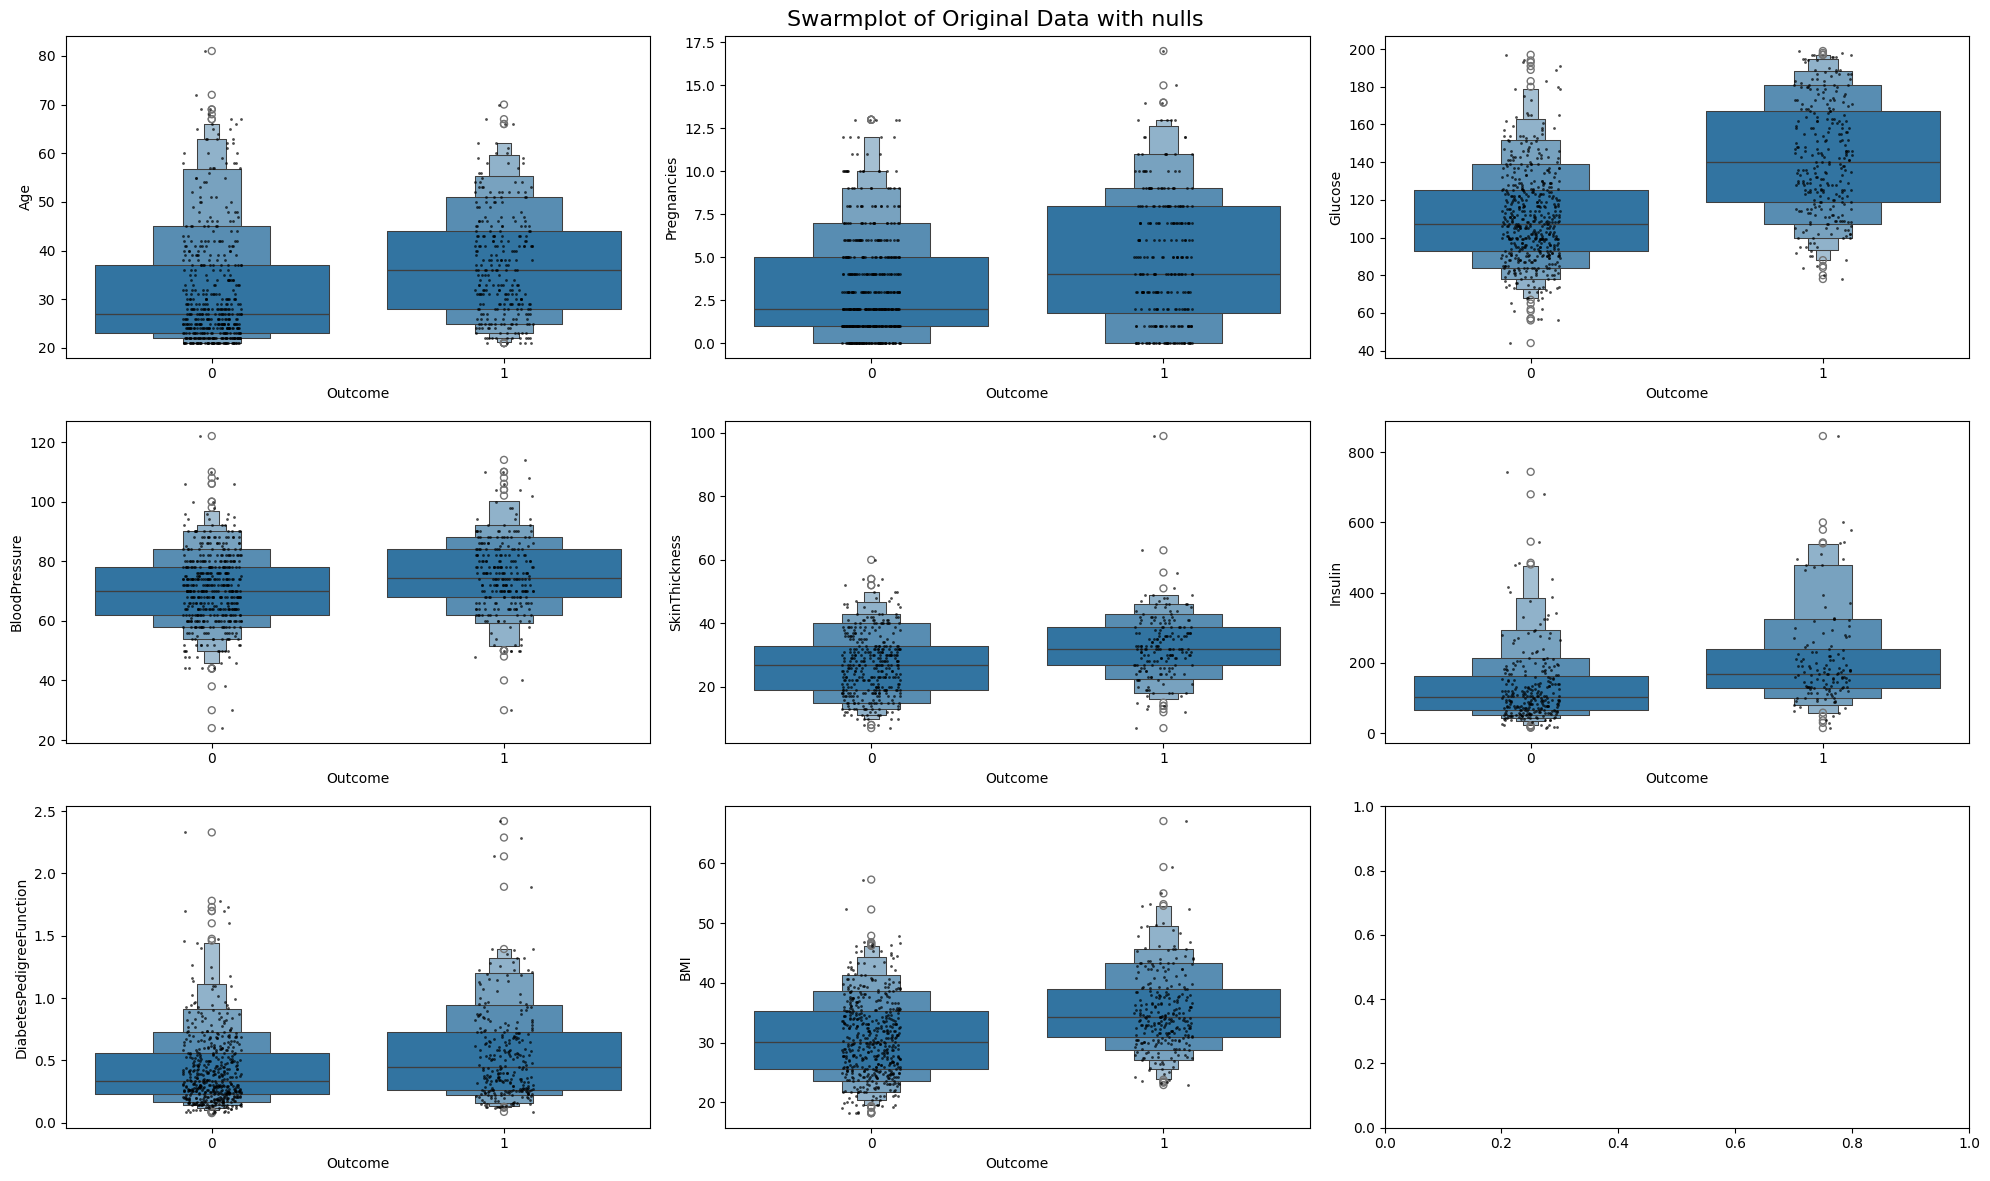

In [308]:

# Swarmplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(3, 3, figsize=(20, 12))  # Increased figure size for more room

sns.stripplot(ax=ax[0, 0], x=dataset["Outcome"], y=dataset["Age"], color="black", alpha=0.7, size=2)  # Use stripplot and reduced size
sns.boxenplot(ax=ax[0, 0], x=dataset["Outcome"], y=dataset["Age"])

sns.stripplot(ax=ax[0, 1], x=dataset["Outcome"], y=dataset["Pregnancies"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[0, 1], x=dataset["Outcome"], y=dataset["Pregnancies"])

sns.stripplot(ax=ax[0, 2], x=dataset["Outcome"], y=dataset["Glucose"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[0, 2], x=dataset["Outcome"], y=dataset["Glucose"])

sns.stripplot(ax=ax[1, 0], x=dataset["Outcome"], y=dataset["BloodPressure"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 0], x=dataset["Outcome"], y=dataset["BloodPressure"])

sns.stripplot(ax=ax[1, 1], x=dataset["Outcome"], y=dataset["SkinThickness"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 1], x=dataset["Outcome"], y=dataset["SkinThickness"])

sns.stripplot(ax=ax[1, 2], x=dataset["Outcome"], y=dataset["Insulin"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[1, 2], x=dataset["Outcome"], y=dataset["Insulin"])

# Use a sample of the data to reduce plot congestion for time
#sns.stripplot(ax=ax[2, 1], x=dataset["Outcome"], y=dataset["BMI"], color="black", alpha=0.7, size=2, data=dataset.sample(100))
# view all samples
sns.stripplot(ax=ax[2, 1], x=dataset["Outcome"], y=dataset["BMI"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[2, 1], x=dataset["Outcome"], y=dataset["BMI"])

# Use a sample of the data to reduce plot congestion for time
#sns.stripplot(ax=ax[2, 0], x=dataset["Outcome"], y=dataset["DiabetesPedigreeFunction"], color="black", alpha=0.7, size=2, data=dataset.sample(100))
# view all samples
sns.stripplot(ax=ax[2, 0], x=dataset["Outcome"], y=dataset["DiabetesPedigreeFunction"], color="black", alpha=0.7, size=2)
sns.boxenplot(ax=ax[2, 0], x=dataset["Outcome"], y=dataset["DiabetesPedigreeFunction"])

plt.suptitle('Swarmplot of Original Data with nulls', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

Features tend to skew lower on non-dabetic (0) outcome and higher on diabetic (1) outcome but still a lot of overlap.

                          Orig_wnulls_Outcome
Pregnancies                          0.221898
Glucose                              0.494650
BloodPressure                        0.170589
SkinThickness                        0.259491
Insulin                              0.303454
BMI                                  0.313680
DiabetesPedigreeFunction             0.173844
Age                                  0.238356
Outcome                              1.000000


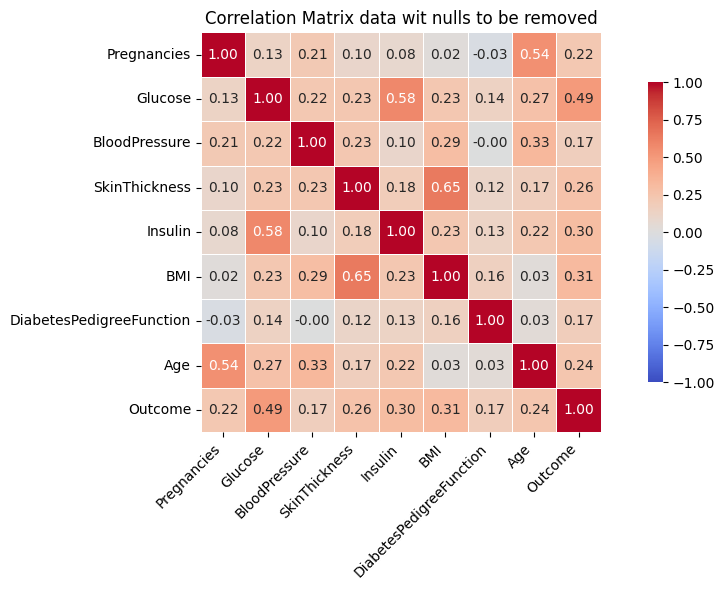

In [309]:
## correlation mat
corr_mat = dataset.corr()
corr_matrix_results = pd.DataFrame(corr_mat["Outcome"])
corr_matrix_results.rename(columns = {"Outcome": "Orig_wnulls_Outcome"},inplace=True)
print(corr_matrix_results)

# create heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix data wit nulls to be removed')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



In [310]:
# is null table
# Filter rows with any NaN values
df_with_nulls = dataset[dataset.isnull().any(axis=1)]

df_with_nulls

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.0,NaN,44.0,0.403,43,1
762,9,89.0,62.0,NaN,NaN,22.5,0.142,33,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [311]:
## counting the number of diabetic and non diabetic from the dataset
df_with_nulls['Outcome'].value_counts()

Outcome
0    238
1    138
Name: count, dtype: int64

Original data approx 2:1 no diabetes to diabetes. slightly less imbalance here but similar. Continue with null data rather than drop.

# 2.2.1.1 Investigating logging of some features to reduce skew

In [312]:
# Generate dataframe to contain skewed data logged - seperate for direct comparison
# specify this is a copy and not a view table to add further columns without error
dataset_log = dataset.copy()
# # log scaling - all left skew except glucose and blood pressure
# + 1 to avoid - infinity when logs 0
dataset_log["Pregnancies"]= np.log(dataset_log["Pregnancies"] + 1)
dataset_log["Age"]= np.log(dataset_log["Age"] + 1)
dataset_log["SkinThickness"]= np.log(dataset_log["SkinThickness"] + 1)
dataset_log["Insulin"]= np.log(dataset_log["Insulin"] + 1)
dataset_log["BMI"]= np.log(dataset_log["BMI"] + 1)
dataset_log["DiabetesPedigreeFunction"]= np.log(dataset_log["DiabetesPedigreeFunction"] + 1)

dataset_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [313]:
dataset_log.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,1.310613,121.686763,72.405184,3.341781,4.818456,3.489204,0.365317,3.481574,0.348958
std,0.769830,30.535641,12.382158,0.372476,0.691261,0.205697,0.198510,0.313364,0.476951
min,0.000000,44.000000,24.000000,2.079442,2.708050,2.954910,0.075107,3.091042,0.000000
25%,0.693147,99.000000,64.000000,3.135494,4.347031,3.349904,0.218131,3.218876,0.000000
50%,1.386294,117.000000,72.000000,3.401197,4.836282,3.505557,0.316633,3.401197,0.000000
75%,1.945910,141.000000,80.000000,3.610918,5.252273,3.627004,0.486277,3.737670,1.000000
max,2.890372,199.000000,122.000000,4.605170,6.741701,4.220977,1.229641,4.406719,1.000000


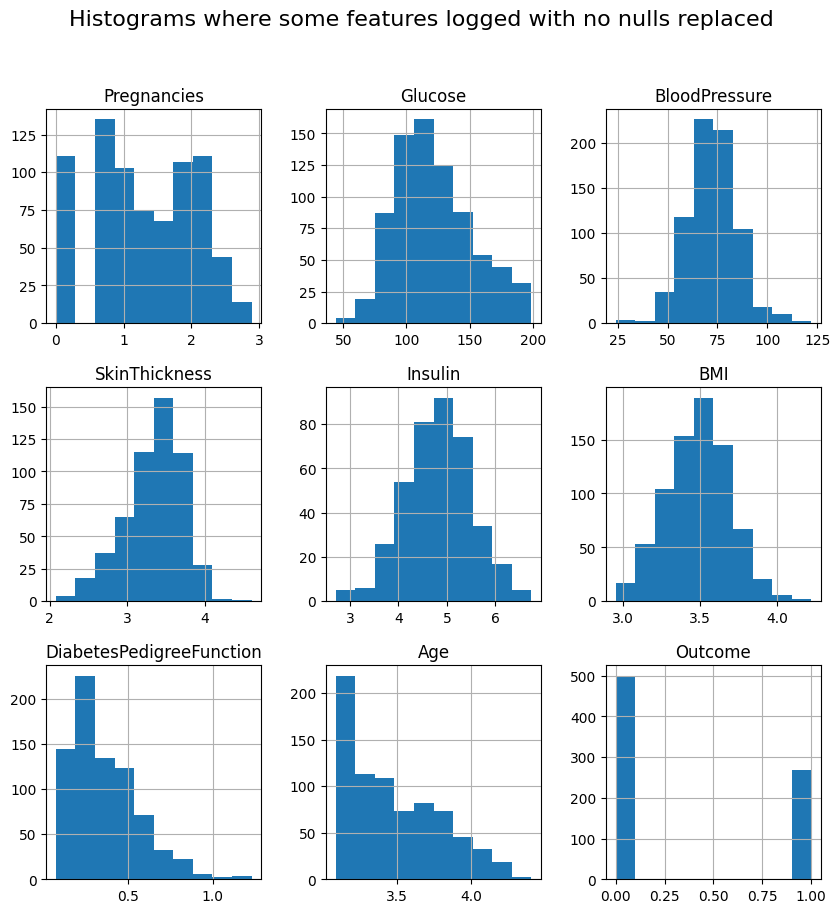

In [314]:
## histogram
dataset_log.hist(bins= 10, figsize=(10,10))
plt.suptitle('Histograms where some features logged with no nulls replaced', fontsize=16)
plt.show()

                          Orig_wnulls_Outcome  Outcome_featslogged_wnull
Pregnancies                          0.221898                   0.179739
Glucose                              0.494650                   0.494650
BloodPressure                        0.170589                   0.170589
SkinThickness                        0.259491                   0.263175
Insulin                              0.303454                   0.351004
BMI                                  0.313680                   0.322682
DiabetesPedigreeFunction             0.173844                   0.179950
Age                                  0.238356                   0.274247
Outcome                              1.000000                   1.000000


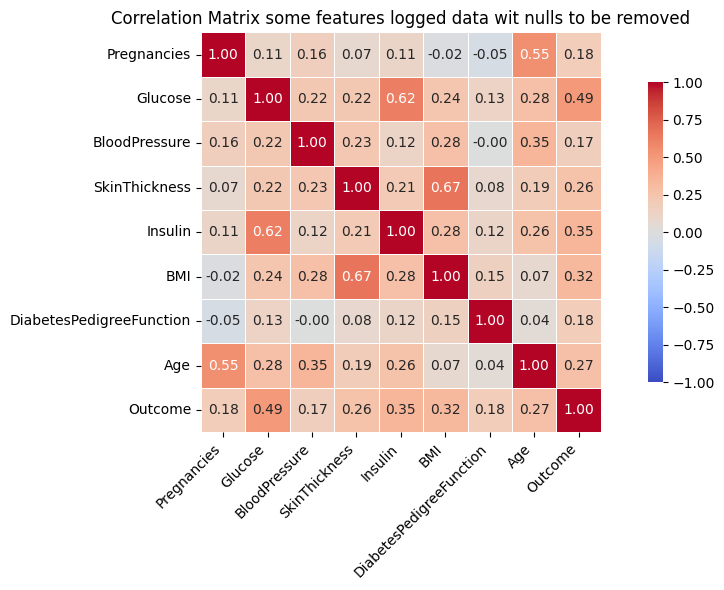

In [315]:
## correlation mat
corr_mat = dataset_log.corr()
corr_matrix_results["Outcome_featslogged_wnull"] = corr_mat["Outcome"]
print(corr_matrix_results)

# create heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix some features logged data wit nulls to be removed')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# 2.2.2 data cleaning filling with median/mean

# 2.2.2.1 nonlogged data

In [316]:
## filling glucose, Bloodpressure with mean
## filling skinthickness and insulin, BMI with median
##fillna function
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['SkinThickness'].median())
dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Insulin'].median())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].median())

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [317]:
## print dataset after imputing missing values
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


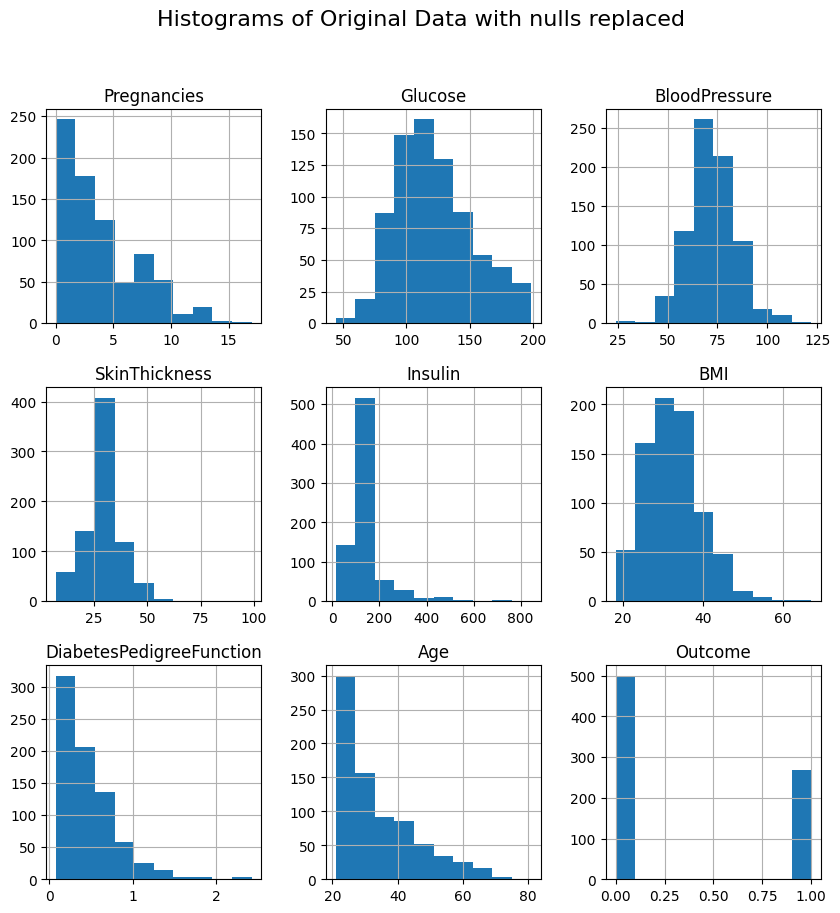

In [318]:
## histogram
dataset.hist(bins= 10, figsize=(10,10))
plt.suptitle('Histograms of Original Data with nulls replaced', fontsize=16)
plt.show()

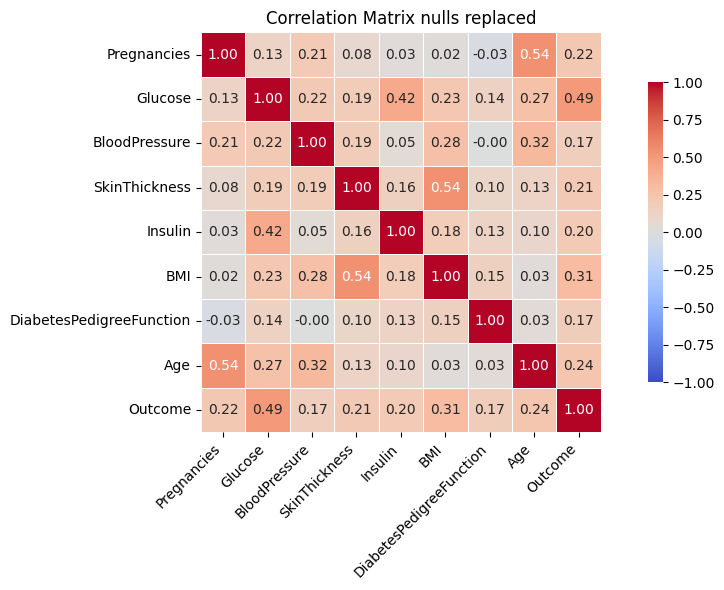

,Orig_wnulls_Outcome,Outcome_featslogged_wnull,Outcome_Orig_nonull
Pregnancies,0.221898,0.179739,0.221898
Glucose,0.494650,0.494650,0.492928
BloodPressure,0.170589,0.170589,0.166074
SkinThickness,0.259491,0.263175,0.214873
Insulin,0.303454,0.351004,0.203790
BMI,0.313680,0.322682,0.312038
DiabetesPedigreeFunction,0.173844,0.179950,0.173844
Age,0.238356,0.274247,0.238356
Outcome,1.000000,1.000000,1.000000


In [319]:
## correlation mat
corr_mat = dataset.corr()


# create heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix nulls replaced')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

corr_matrix_results["Outcome_Orig_nonull"] = corr_mat["Outcome"]
corr_matrix_results

dropped correlation to insulin 0.3 to 0.2

# 2.2.2.2 logged data

In [320]:
## filling glucose, Bloodpressure with mean
## filling skinthickness and insulin, BMI with median
##fillna function
dataset_log['Glucose'] = dataset_log['Glucose'].fillna(dataset_log['Glucose'].mean())
dataset_log['BloodPressure'] = dataset_log['BloodPressure'].fillna(dataset_log['BloodPressure'].mean())
dataset_log['SkinThickness'] = dataset_log['SkinThickness'].fillna(dataset_log['SkinThickness'].median())
dataset_log['Insulin'] = dataset_log['Insulin'].fillna(dataset_log['Insulin'].median())
dataset_log['BMI'] = dataset_log['BMI'].fillna(dataset_log['BMI'].median())

dataset_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [321]:
dataset_log.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148.0,72.0,3.583519,4.836282,3.543854,0.486738,3.931826,1
1,0.693147,85.0,66.0,3.401197,4.836282,3.317816,0.300845,3.465736,0
2,2.197225,183.0,64.0,3.401197,4.836282,3.190476,0.514021,3.496508,1
3,0.693147,89.0,66.0,3.178054,4.553877,3.370738,0.154436,3.091042,0
4,0.000000,137.0,40.0,3.583519,5.129899,3.786460,1.190279,3.526361,1


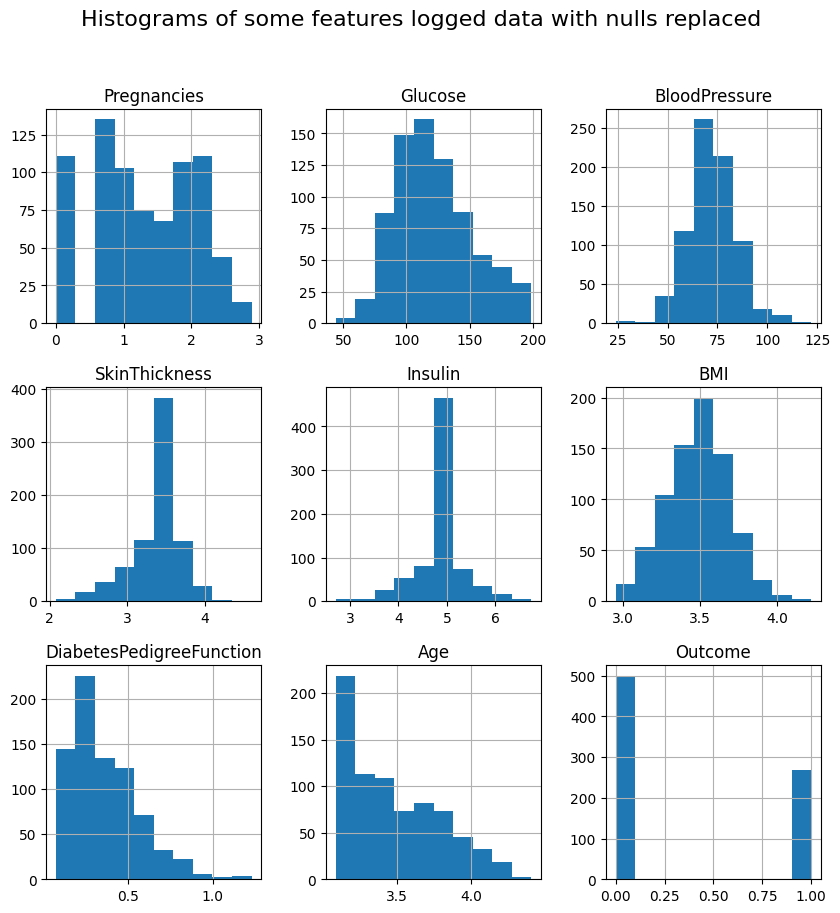

In [322]:
## histogram
dataset_log.hist(bins= 10, figsize=(10,10))
plt.suptitle('Histograms of some features logged data with nulls replaced', fontsize=16)
plt.show()

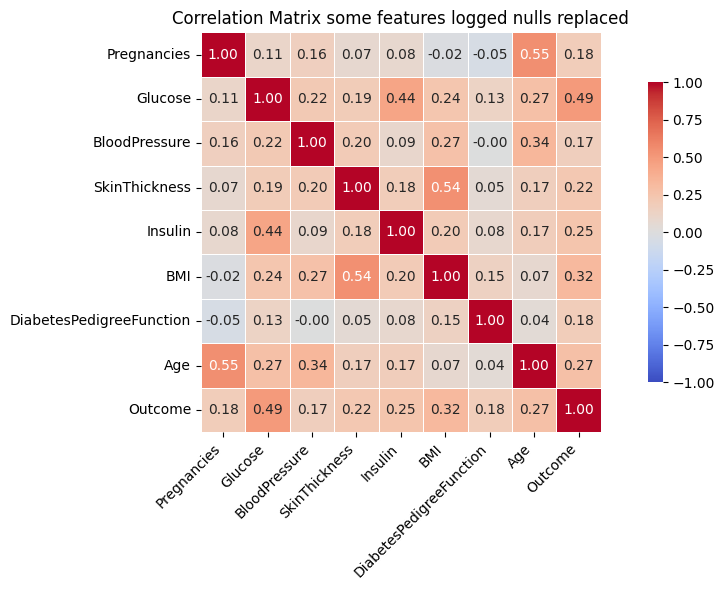

,Orig_wnulls_Outcome,Outcome_featslogged_wnull,Outcome_Orig_nonull,Outcome_somelog_nonull
Pregnancies,0.221898,0.179739,0.221898,0.179739
Glucose,0.494650,0.494650,0.492928,0.492928
BloodPressure,0.170589,0.170589,0.166074,0.166074
SkinThickness,0.259491,0.263175,0.214873,0.222086
Insulin,0.303454,0.351004,0.203790,0.248705
BMI,0.313680,0.322682,0.312038,0.320458
DiabetesPedigreeFunction,0.173844,0.179950,0.173844,0.179950
Age,0.238356,0.274247,0.238356,0.274247
Outcome,1.000000,1.000000,1.000000,1.000000


In [323]:
## correlation mat
corr_mat = dataset_log.corr()


# create heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_mat,  annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix some features logged nulls replaced')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

corr_matrix_results["Outcome_somelog_nonull"] = corr_mat["Outcome"]
corr_matrix_results

# 3 Modelling
# 3.1 Logistic regression model (logged features vs. non logged)

No features logged 

In [324]:
## independednt and dependent variable
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## split our dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## logistic regression model
log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
log_reg.fit(x_train, y_train)

## predict on the test data
y_pred_log = log_reg.predict(x_test)

## putting in a dataframe
df = pd.DataFrame({'Actual_Value': y_test, 'Predicted_value': y_pred_log})
print("Predicted vs Actual taable",df)

## evaluate the model accuracy
print("\n","accuracy: ",accuracy_score(y_test, y_pred_log))


## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_log)

print("\n","confusion matrix: ","\n",conf_mat)

#normalisated
normed_c = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
print("\n","normalised confusion matrix: ","\n",normed_c)



Predicted vs Actual taable      Actual_Value  Predicted_value
642             1                0
695             1                0
453             0                0
565             0                0
99              1                1
..            ...              ...
455             1                1
354             0                0
216             1                0
509             0                0
728             0                0

[231 rows x 2 columns]

 accuracy:  0.7748917748917749

 confusion matrix:  
 [[132  15]
 [ 37  47]]

 normalised confusion matrix:  
 [[0.89795918 0.10204082]
 [0.44047619 0.55952381]]


In [325]:
print("\n","classifciation report: ","\n",classification_report(y_test, y_pred_log))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)


 classifciation report:  
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       147
           1       0.76      0.56      0.64        84

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231

AUC: 0.728741


Compare to where some features logged, based on skew

In [326]:
## independednt and dependent variable
X = dataset_log.iloc[:, :-1]
y = dataset_log.iloc[:, -1]

## split our dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## logistic regression model
log_reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
log_reg.fit(x_train, y_train)

## predict on the test data
y_pred_log = log_reg.predict(x_test)

## putting in a dataframe
df = pd.DataFrame({'Actual_Value': y_test, 'Predicted_value': y_pred_log})
print("Predicted vs Actual taable",df)

## evaluate the model accuracy
print("\n","accuracy: ",accuracy_score(y_test, y_pred_log))


## CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, y_pred_log)

print("\n","confusion matrix: ","\n",conf_mat)

#normalisated
normed_c = conf_mat / np.sum(conf_mat, axis=1, keepdims=True)
print("\n","normalised confusion matrix: ","\n",normed_c)

Predicted vs Actual taable      Actual_Value  Predicted_value
642             1                1
695             1                0
453             0                0
565             0                0
99              1                1
..            ...              ...
455             1                1
354             0                0
216             1                0
509             0                0
728             0                0

[231 rows x 2 columns]

 accuracy:  0.7878787878787878

 confusion matrix:  
 [[129  18]
 [ 31  53]]

 normalised confusion matrix:  
 [[0.87755102 0.12244898]
 [0.36904762 0.63095238]]


In [327]:
print("\n","classifciation report: ","\n",classification_report(y_test, y_pred_log))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)


 classifciation report:  
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       147
           1       0.75      0.63      0.68        84

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231

AUC: 0.754252


Continue with logged features as slightly better accuracy score and better at predicting diabetes (1) despite lower count of this than non-diabetes (0) in this imblanced dataset. 

# 3.1.1 Logistic regression Further accuracy analysis 

In [328]:
# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_log)
print('AUC: %f' %auc)

AUC: 0.754252


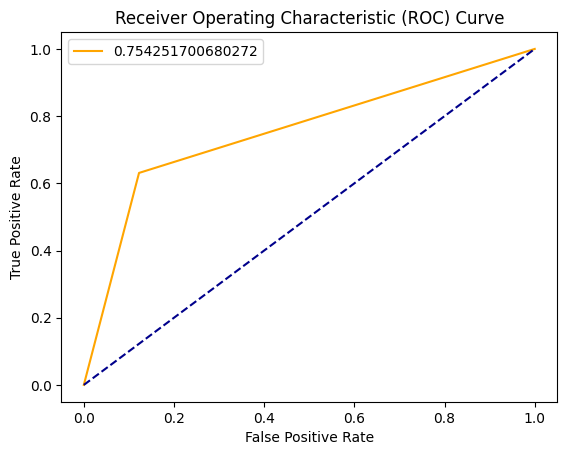

In [329]:
# use underscore to skip a varaible and stop errors - in this case not setting a treshold e.g. could maybe do x_train, x_test but might not work

fpr, tpr, _ = roc_curve(y_test,y_pred_log)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [330]:
# checking treshold as left if out above - show that using default 0 and 1
fpr, tpr, tresholds = roc_curve(y_test, y_pred_log)

for i in range (len(tresholds)):
    print(f'"Threshold: {tresholds[i]: .3f}, TPR: {tpr[i]: .3f}, FPR: {fpr[i]: .3f}')

"Threshold:  inf, TPR:  0.000, FPR:  0.000
"Threshold:  1.000, TPR:  0.631, FPR:  0.122
"Threshold:  0.000, TPR:  1.000, FPR:  1.000


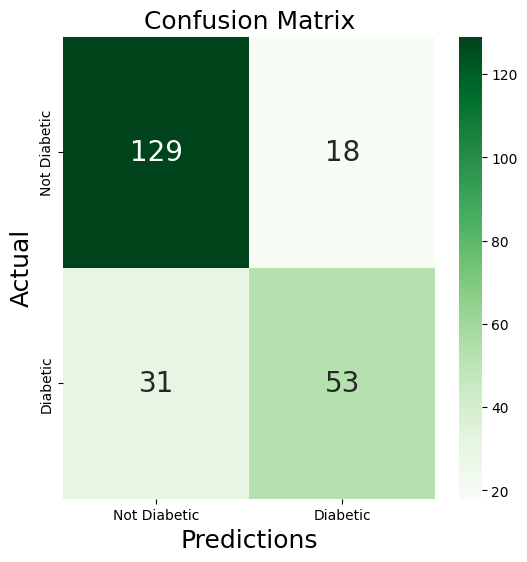

In [331]:
# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(conf_mat, 
            annot=True, 
            fmt='d', 
            cmap='Greens',
            xticklabels=labels,
            yticklabels=labels,
            annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

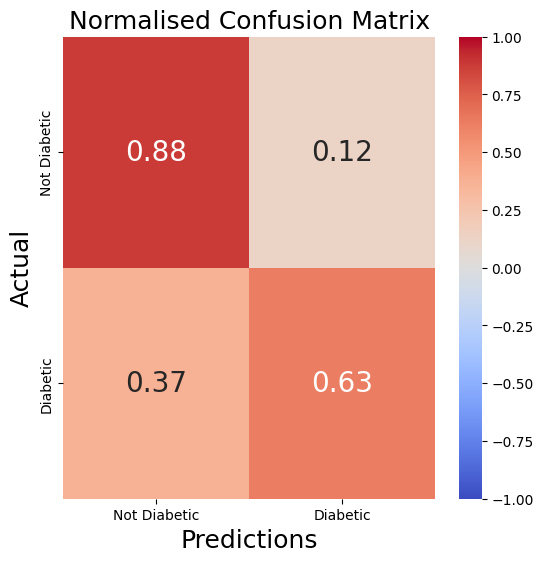

In [332]:
# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True,  
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels,
            annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

# Create labels
labels = ['Not Diabetic', 'Diabetic']



In [333]:
# Generate x_test table with y_test and y_pred results

y_test_table = pd.DataFrame(y_test)
y_test_table.columns = ["Actual"]
print("y_test_oldindex","\n",y_test_table.head())
y_test_table.reset_index(inplace=True)
print("y_test reset index","\n",y_test_table.head())
pred_table = pd.DataFrame(y_pred_log)
pred_table.columns = ["Predicted"]
x_test_table = pd.DataFrame(x_test)
x_test_table.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
comp_res_table = x_test_table.copy()
comp_res_table["Orig_index"] = y_test_table["index"]
comp_res_table["Actual"] = y_test_table["Actual"]
comp_res_table["Predicted"] = pred_table["Predicted"]
comp_res_table

y_test_oldindex 
      Actual
642       1
695       1
453       0
565       0
99        1
y_test reset index 
    index  Actual
0    642       1
1    695       1
2    453       0
3    565       0
4     99       1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Orig_index,Actual,Predicted
0,0.805313,0.871933,0.606709,0.128483,0.034198,-0.371107,-0.994129,1.404306,642,1,1
1,0.978106,0.706086,1.448428,-0.491112,2.795268,-0.227688,-1.209270,0.938205,695,1,0
2,-0.291117,-0.056811,-0.032561,0.128483,0.034198,-2.306470,1.196322,2.536546,453,0,0
3,-0.291117,-0.852877,-1.581761,-2.227084,-0.682348,-0.953995,0.963502,-1.109786,565,0,0
4,-0.815802,0.042697,1.448428,1.997741,1.192312,2.135164,-0.410817,-0.067183,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...
226,1.791546,1.800676,-0.908386,0.239915,0.034198,0.250910,-0.852988,0.557371,455,1,1
227,0.081152,-1.018724,0.438365,0.128483,0.034198,1.402428,0.395898,-1.250125,354,0,0
228,0.605837,-0.388505,-0.908386,1.271938,0.098613,0.554919,0.250612,-0.722719,216,1,0
229,1.130521,-0.023642,0.438365,0.128483,0.034198,-1.158350,-0.105914,2.170095,509,0,0


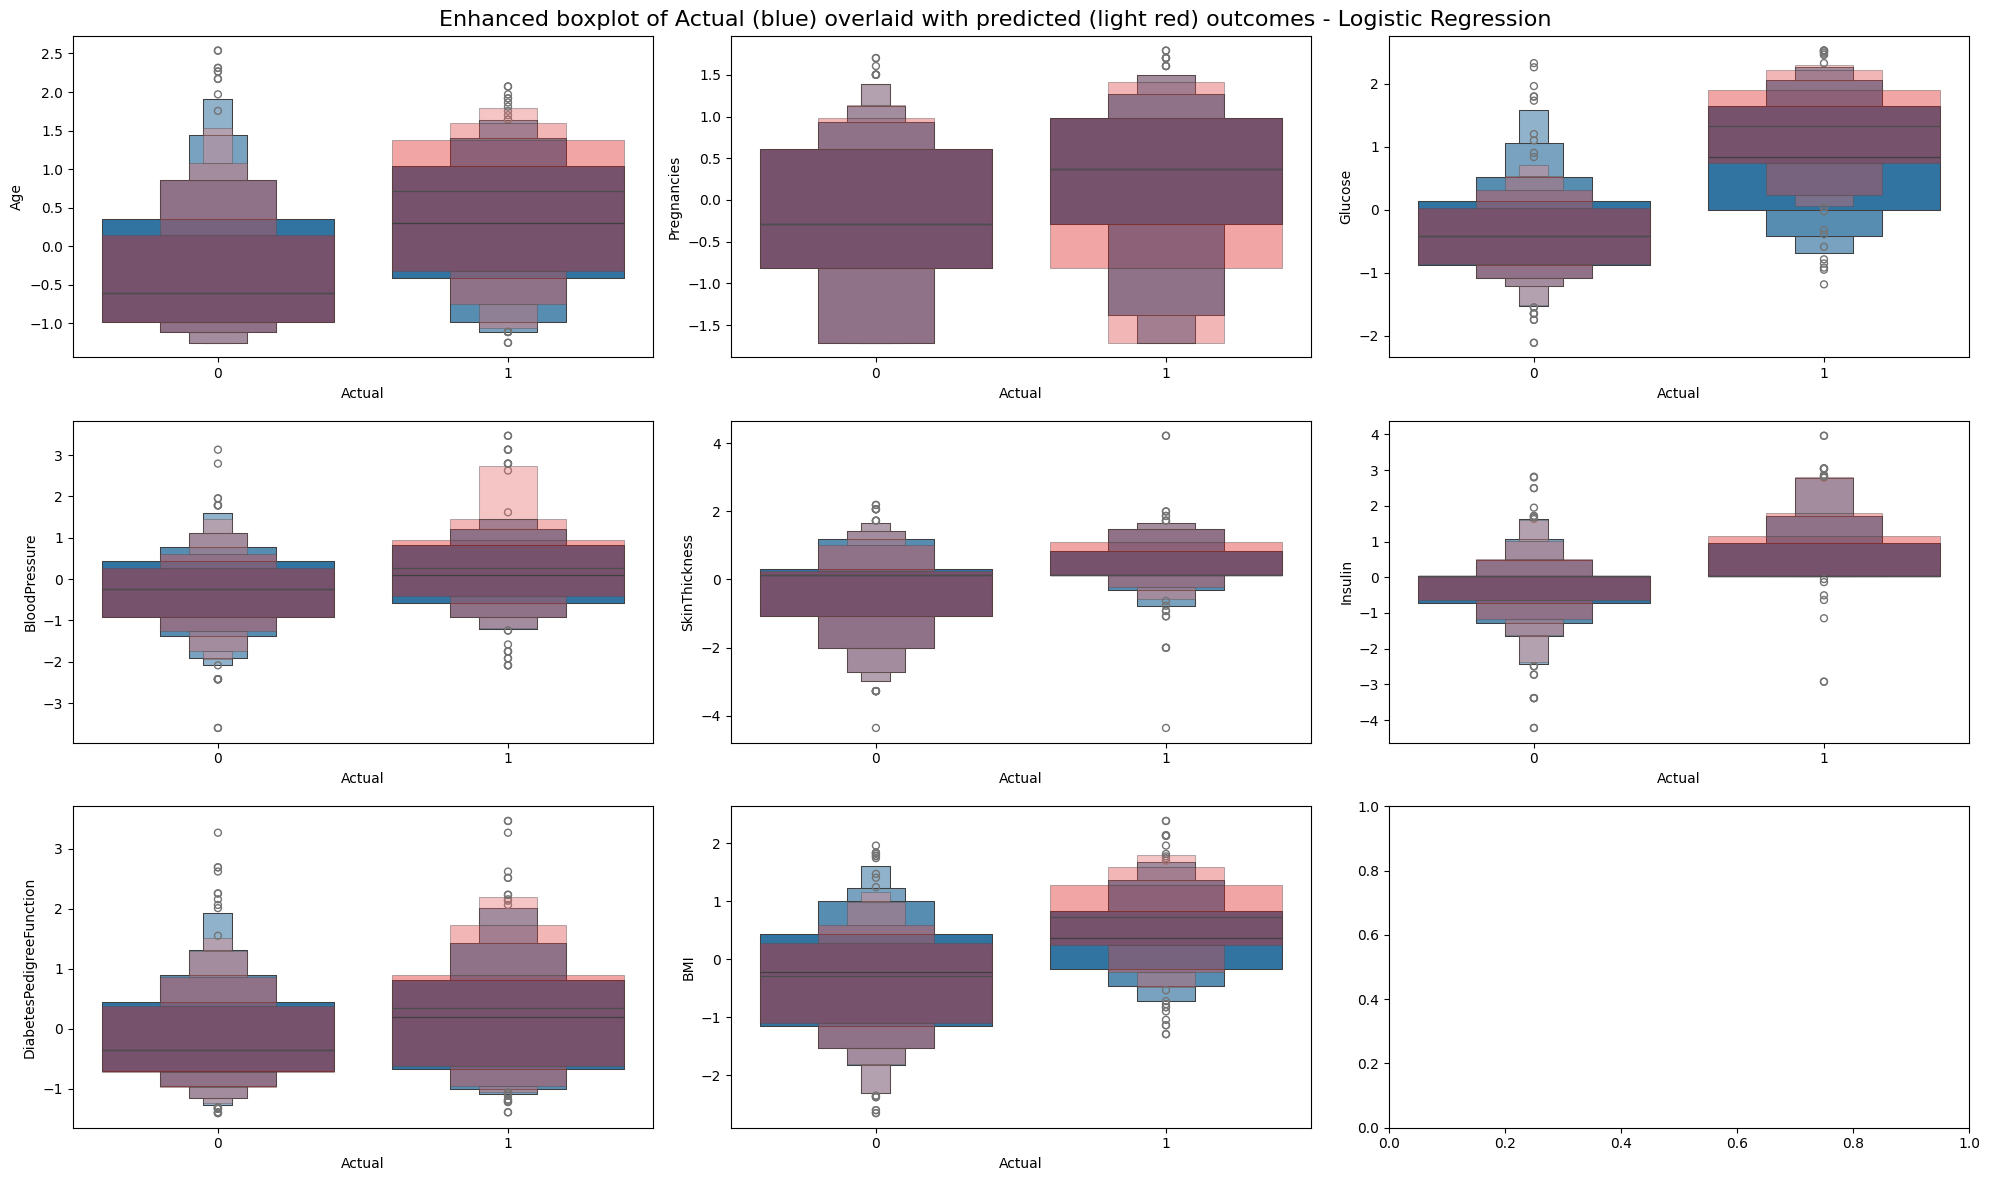

In [334]:

# Enhanced boxplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(3, 3, figsize=(20, 12))  # Increased figure size for more room

sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Actual"], y=comp_res_table["Age"])
sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Predicted"], y=comp_res_table["Age"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Actual"], y=comp_res_table["Pregnancies"])
sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Predicted"], y=comp_res_table["Pregnancies"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Actual"], y=comp_res_table["Glucose"])
sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Predicted"], y=comp_res_table["Glucose"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Actual"], y=comp_res_table["BloodPressure"])
sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Predicted"], y=comp_res_table["BloodPressure"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Actual"], y=comp_res_table["SkinThickness"])
sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Predicted"], y=comp_res_table["SkinThickness"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Actual"], y=comp_res_table["Insulin"])
sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Predicted"], y=comp_res_table["Insulin"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Actual"], y=comp_res_table["BMI"])
sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Predicted"], y=comp_res_table["BMI"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Actual"], y=comp_res_table["DiabetesPedigreeFunction"])
sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Predicted"], y=comp_res_table["DiabetesPedigreeFunction"],color="red", alpha=0.4)

plt.suptitle('Enhanced boxplot of Actual (blue) overlaid with predicted (light red) outcomes - Logistic Regression', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

Predicted/overlay tends to be lower on non-dabetic (0) outcome and higher on diabetic (1) outcome, as expected. Pregnancy is the only feature that doesn't tend this way and the diabetic (1) outcome has predicted falling into lower half also.

# 3.2 SVM

In [335]:
## independednt and dependent variable
X = dataset_log.iloc[:, :-1]
y = dataset_log.iloc[:, -1]

## split our dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train =sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Save the scaler to a file using pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)
print("Scaler has been re-saved successfully!")



Scaler has been re-saved successfully!


In [336]:
# Instantiating the SVM algorithm 
#Create a SVM Classifier
svm_linear = svm.SVC(kernel='linear')
svm_sigmoid = svm.SVC(kernel='sigmoid') 
svm_rbf = svm.SVC(kernel='rbf') 

# Fitting the model 
svm_linear.fit(x_train, y_train)
svm_sigmoid.fit(x_train, y_train)
svm_rbf.fit(x_train, y_train)

# Predicting the test variables
y_pred_linear = svm_linear.predict(x_test)
y_pred_sigmoid = svm_sigmoid.predict(x_test)
y_pred_rbf = svm_rbf.predict(x_test)

# Getting the score 
print("Linear Kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_linear))
print("Sigmoid kernel Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))
print("rbf kernelAccuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

## confussion matrix for the kernels
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)
conf_mat_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print("\n","confusion matrix svm linear: ","\n",conf_mat_linear)
print("\n","confusion matrix svm sigmoid: ","\n",conf_mat_sigmoid)
print("\n","confusion matrix svm rbf: ","\n",conf_mat_rbf)

#normalisated
normed_c_linear = conf_mat_linear / np.sum(conf_mat_linear, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm linear: ","\n",normed_c_linear)
normed_c_sigmoid = conf_mat_sigmoid / np.sum(conf_mat_sigmoid, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm sigmoid: ","\n",normed_c_sigmoid)
normed_c_rbf = conf_mat_rbf / np.sum(conf_mat_rbf, axis=1, keepdims=True)
print("\n","normalised confusion matrix svm rbf: ","\n",normed_c_rbf)



Linear Kernel Accuracy: 0.7878787878787878
Sigmoid kernel Accuracy: 0.7402597402597403
rbf kernelAccuracy: 0.7402597402597403

 confusion matrix svm linear:  
 [[131  16]
 [ 33  51]]

 confusion matrix svm sigmoid:  
 [[125  22]
 [ 38  46]]

 confusion matrix svm rbf:  
 [[128  19]
 [ 41  43]]

 normalised confusion matrix svm linear:  
 [[0.89115646 0.10884354]
 [0.39285714 0.60714286]]

 normalised confusion matrix svm sigmoid:  
 [[0.85034014 0.14965986]
 [0.45238095 0.54761905]]

 normalised confusion matrix svm rbf:  
 [[0.8707483  0.1292517 ]
 [0.48809524 0.51190476]]


In [337]:
# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred_linear)
print('AUC linear: %f' %auc)
auc = roc_auc_score(y_test, y_pred_sigmoid)
print('AUC sigmoid: %f' %auc)
auc = roc_auc_score(y_test, y_pred_rbf)
print('AUC rbf: %f' %auc)

AUC linear: 0.749150
AUC sigmoid: 0.698980
AUC rbf: 0.691327


AUC log regression 0.754

In [338]:
# Save the log reg model - highest prediction of diabetic
with open('logreg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

print("model has been re-saved successfully!")

model has been re-saved successfully!


# 3.3 Neural Network

# 3.3.1 Three hidden layers [8 - (50-20-4) - 1] 80 epochs

In [339]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the input/visible layers - 1D array 
model.add(Input(shape=(X.shape[1],)))
print("Input elements:",X.shape[1])



# level complexity determines number of hidden layers
## hidden layer 1
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu'))
## hidden layer 2
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 1
model.add(Dropout(0.4))
## hidden layer 3
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 2
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

# train, test and validation data if have lots of data. don't have lots of data use 25%
## model
history = model.fit(x_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25)


Input elements: 8
Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6264 - loss: 0.6925 - val_accuracy: 0.6370 - val_loss: 0.6909
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6575 - loss: 0.6898 - val_accuracy: 0.6370 - val_loss: 0.6879
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6575 - loss: 0.6857 - val_accuracy: 0.6370 - val_loss: 0.6806
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6575 - loss: 0.6749 - val_accuracy: 0.6370 - val_loss: 0.6576
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6575 - loss: 0.6459 - val_accuracy: 0.6370 - val_loss: 0.6048
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6575 - loss: 0.5894 - val_accuracy: 0.6370 - val_loss: 0.5502
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6575 - loss: 0.5381 - val_accuracy: 0.6370 - val_loss: 0.5317
Epoch 8/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6575 - loss: 0.5360 - val_ac

In [340]:
model.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,679 (18.28 KB)

 Trainable params: 1,559 (6.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,120 (12.19 KB)

In [341]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)


val_accuracy is: 71.42%


,accuracy,loss,val_accuracy,val_loss
66,0.830846,0.385693,0.733333,0.522255
67,0.833333,0.394194,0.725926,0.523269
68,0.840796,0.375956,0.733333,0.530510
69,0.830846,0.398853,0.725926,0.528953
70,0.845771,0.395109,0.733333,0.528538
71,0.858209,0.381092,0.725926,0.534177
72,0.840796,0.393890,0.725926,0.533291
73,0.843284,0.376045,0.725926,0.535718
74,0.848259,0.374413,0.733333,0.538710
75,0.850746,0.370838,0.740741,0.535722


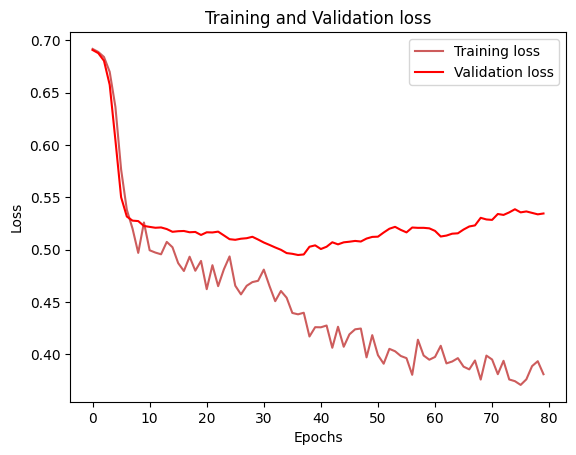

In [342]:

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

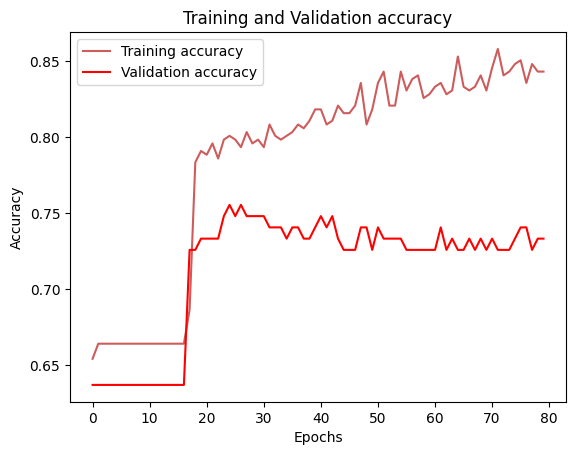

In [343]:

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [344]:
# Predicting the test set results
y_pred = model.predict(x_test)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       147
           1       0.65      0.61      0.63        84

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

AUC: 0.711735
The mean squared error (MSE) for the test data set is: [0.5459966659545898, 0.7445887327194214]



 confusion matrix ANN:  [[120  27]
 [ 33  51]]

 normalised confusion matrix ANN:  
 [[0.81632653 0.18367347]
 [0.39285714 0.60714286]]


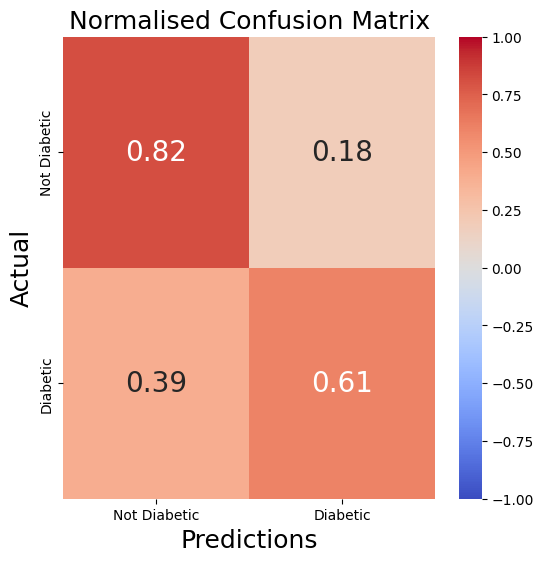

In [345]:

cf_matrix = confusion_matrix(y_test, y_pred)
print("\n","confusion matrix ANN: ",cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)



# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()


# 3.3.2 Three hidden layers [8 - (50-20-4) - 1] and early stop

In [346]:
## Neural Network
## initialise the NN
model = Sequential()

##set up the input/visible layers - 1D array 
model.add(Input(shape=(X.shape[1],)))
print("Input elements:",X.shape[1])



# level complexity determines number of hidden layers
## hidden layer 1
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu'))
## hidden layer 2
model.add(Dense(units= 20, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 1
model.add(Dropout(0.4))
## hidden layer 3
model.add(Dense(units= 4, kernel_initializer= 'uniform', activation = 'relu'))
##regularization 2
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

# train, test and validation data if have lots of data. don't have lots of data use 25%
## model
history = model.fit(x_train, y_train, batch_size = 25, epochs = 80, validation_split=0.25, callbacks=[early_stopping])

Input elements: 8
Epoch 1/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.6653 - loss: 0.6925 - val_accuracy: 0.6370 - val_loss: 0.6909
Epoch 2/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6575 - loss: 0.6899 - val_accuracy: 0.6370 - val_loss: 0.6883
Epoch 3/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6575 - loss: 0.6865 - val_accuracy: 0.6370 - val_loss: 0.6837
Epoch 4/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6575 - loss: 0.6805 - val_accuracy: 0.6370 - val_loss: 0.6725
Epoch 5/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6575 - loss: 0.6669 - val_accuracy: 0.6370 - val_loss: 0.6477
Epoch 6/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6575 - loss: 0.6391 - val_accuracy: 0.6370 - val_loss: 0.6063
Epoch 7/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6575 - loss: 0.6153 - val_accuracy: 0.6370 - val_loss: 0.5663
Epoch 8/80
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6575 - loss: 0.5811 - val_accu

In [347]:
model.summary()

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 50)             │           450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 4)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,679 (18.28 KB)

 Trainable params: 1,559 (6.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,120 (12.19 KB)

In [348]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)


val_accuracy is: 67.31%


,accuracy,loss,val_accuracy,val_loss
2,0.664179,0.685362,0.637037,0.683669
3,0.664179,0.678097,0.637037,0.672528
4,0.664179,0.662746,0.637037,0.647719
5,0.664179,0.631258,0.637037,0.606281
6,0.664179,0.597160,0.637037,0.566340
7,0.664179,0.570327,0.637037,0.541789
8,0.666667,0.541274,0.622222,0.529107
9,0.726368,0.554547,0.725926,0.520550
10,0.756219,0.523386,0.733333,0.510874
11,0.778607,0.505526,0.725926,0.504740


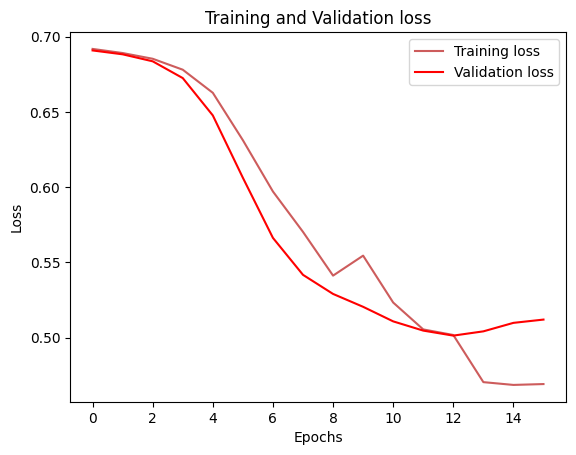

In [349]:

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

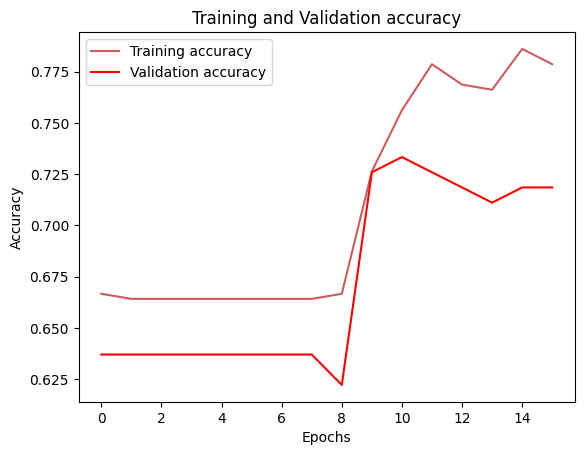

In [350]:
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [351]:
# Predicting the test set results
y_pred = model.predict(x_test)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       147
           1       0.66      0.74      0.70        84

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.77      0.77      0.77       231

AUC: 0.760204
The mean squared error (MSE) for the test data set is: [0.47135215997695923, 0.7965368032455444]


[[115  32]
 [ 22  62]]

 normalised confusion matrix ANN:  
 [[0.78231293 0.21768707]
 [0.26190476 0.73809524]]


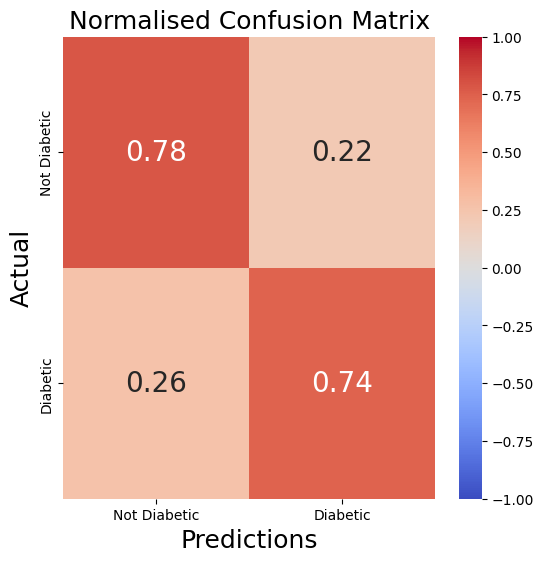

In [352]:

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

# 3.3.3 Using early stop and 1 hidden layer [8 - (16) - 1]

In [353]:
# rerun model several times to check AUC score
count = 0
#AUC_epoch = np.empty((rows, cols))
scores = list()
earlystop = list()
while count < 6:
    #Neural network

    # try 1 hidden layer with input layer *2
    inp_eles = X.shape[1]
    hl1_unit = 2*inp_eles
    print("Input elements:",inp_eles," Hidden elements layer 1: ",hl1_unit)

    ## initialise the NN
    model = Sequential()

    ##set up the input/visible layers - 1D array 
    model.add(Input(shape=(inp_eles,)))

    # add hidden layer 1
    model.add(Dense(units = hl1_unit, kernel_initializer= 'uniform', activation='relu'))
    # add output layer
    model.add(Dense(units = 1, kernel_initializer= 'uniform', activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

    # Fit the model with the EarlyStopping callback
    history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.3, callbacks=[early_stopping])
        
    # Predicting the test set results
    y_pred = model.predict(x_test)
    # setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
    y_pred = np.where(y_pred > 0.4, 1, 0)
    np.set_printoptions()
    # single score from ROC curve used to compare models
    auc = roc_auc_score(y_test, y_pred)
    scores.append(auc)
    number_of_epochs_it_ran = len(history.history['loss'])
    earlystop.append(number_of_epochs_it_ran)

    count += 1


Input elements: 8  Hidden elements layer 1:  16
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6480 - loss: 0.6879 - val_accuracy: 0.6235 - val_loss: 0.6769
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 0.6630 - val_accuracy: 0.6173 - val_loss: 0.6421
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6561 - loss: 0.6162 - val_accuracy: 0.6543 - val_loss: 0.5983
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7223 - loss: 0.5635 - val_accuracy: 0.6852 - val_loss: 0.5658
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7671 - loss: 0.5224 - val_accuracy: 0.6975 - val_loss: 0.5466
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7864 - loss: 0.4933 - val_accuracy: 0.7346 - val_loss: 0.5351
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7846 - loss: 0.4717 - val_accuracy: 0.7407 - val_loss: 0.5280
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7775 

In [354]:
model.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_94 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

In [355]:
model_rerun_table = pd.DataFrame(scores)
model_rerun_table.columns = ['AUC']
model_rerun_table2 = pd.DataFrame(earlystop)
model_rerun_table2.columns = ['Last epoch']
model_rerun_table["Last epoch"] = model_rerun_table2["Last epoch"]

# print("\n","AUC scores", scores)
# print("\n","Number of epochs", earlystop)
model_rerun_table

# the most robust way to report results and compare models is to repeat your experiment many times (30+) and use summary statistics.

,AUC,Last epoch
0,0.772959,13
1,0.769558,14
2,0.764456,25
3,0.767007,13
4,0.761054,35
5,0.767007,15


In [356]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)



val_accuracy is: 69.84%


,accuracy,loss,val_accuracy,val_loss
1,0.672000,0.656929,0.623457,0.642212
2,0.674667,0.607593,0.629630,0.596184
3,0.720000,0.555124,0.703704,0.560134
4,0.768000,0.516517,0.709877,0.539278
5,0.776000,0.491750,0.716049,0.527773
6,0.781333,0.475302,0.722222,0.520876
7,0.778667,0.463424,0.728395,0.516461
8,0.789333,0.454359,0.722222,0.513844
9,0.792000,0.447296,0.728395,0.512423
10,0.792000,0.441794,0.728395,0.511877


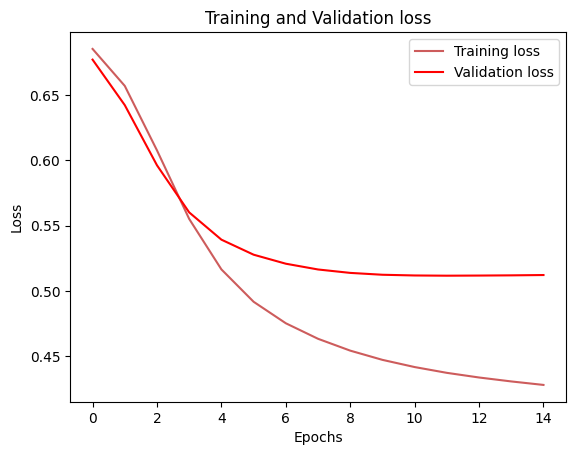

In [357]:

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

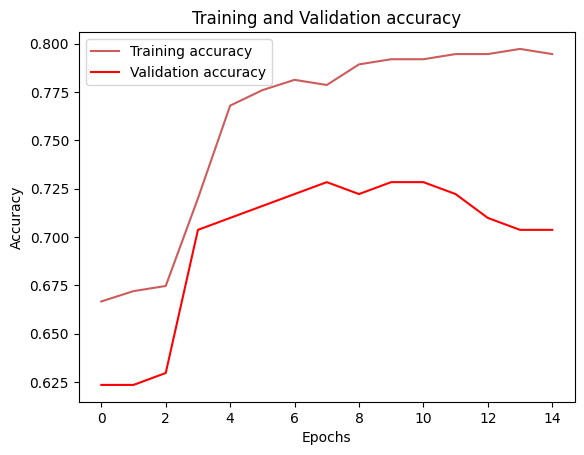

In [358]:


plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [359]:
# Predicting the test set results
y_pred = model.predict(x_test)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       147
           1       0.67      0.74      0.70        84

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231

AUC: 0.767007
The mean squared error (MSE) for the test data set is: [0.4674919545650482, 0.7792207598686218]


[[117  30]
 [ 22  62]]

 normalised confusion matrix ANN:  
 [[0.79591837 0.20408163]
 [0.26190476 0.73809524]]


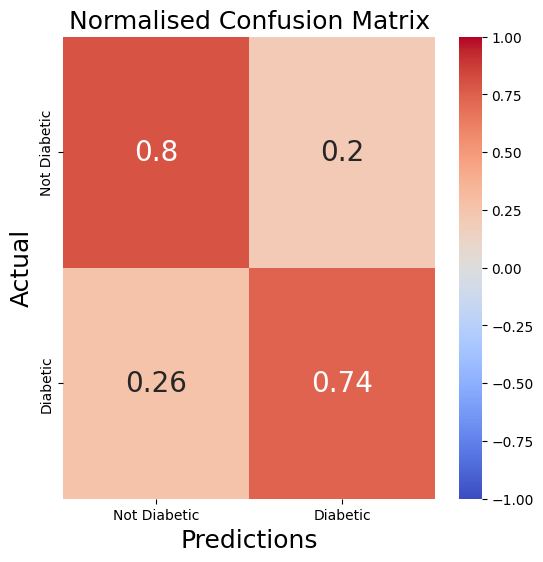

In [360]:


cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

# 3.3.4 Binary preceptron

In [361]:
# rerun model several times to check AUC score
count = 0
#AUC_epoch = np.empty((rows, cols))
scores = list()
earlystop = list()
while count < 6:
    ## Neural Network

    # try 1 hidden layer with input layer *2
    inp_eles = X.shape[1]
    hl1_unit = 2*inp_eles
    print("Input elements:",inp_eles," Hidden elements layer 1: ",hl1_unit)

    ## prep the model
    model = Sequential([
        Input(shape=(inp_eles,)),
        Dense(units = 1, kernel_initializer= 'uniform', activation='sigmoid')
    ])


    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

    # Fit the model with the EarlyStopping callback
    history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.3, callbacks=[early_stopping])

    # Predicting the test set results
    y_pred = model.predict(x_test)
    # setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
    y_pred = np.where(y_pred > 0.4, 1, 0)
    np.set_printoptions()
    # single score from ROC curve used to compare models
    auc = roc_auc_score(y_test, y_pred)
    scores.append(auc)
    number_of_epochs_it_ran = len(history.history['loss'])
    earlystop.append(number_of_epochs_it_ran)
    
    count += 1



Input elements: 8  Hidden elements layer 1:  16
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5207 - loss: 0.6933 - val_accuracy: 0.6481 - val_loss: 0.6792
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6972 - loss: 0.6659 - val_accuracy: 0.6852 - val_loss: 0.6584
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7413 - loss: 0.6424 - val_accuracy: 0.7037 - val_loss: 0.6408
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7425 - loss: 0.6221 - val_accuracy: 0.7037 - val_loss: 0.6259
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7385 - loss: 0.6044 - val_accuracy: 0.7284 - val_loss: 0.6133
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7385 - loss: 0.5890 - val_accuracy: 0.7346 - val_loss: 0.6026
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 - loss: 0.5755 - val_accuracy: 0.7346 - val_loss: 0.5934
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7377 

In [362]:
model_rerun_table3 = pd.DataFrame(scores)
model_rerun_table3.columns = ['AUC']
model_rerun_table4 = pd.DataFrame(earlystop)
model_rerun_table4.columns = ['Last epoch']
model_rerun_table3["Last epoch"] = model_rerun_table4["Last epoch"]

# print("\n","AUC scores", scores)
# print("\n","Number of epochs", earlystop)
model_rerun_table3

# the most robust way to report results and compare models is to repeat your experiment many times (30+) and use summary statistics.

,AUC,Last epoch
0,0.761905,44
1,0.761905,44
2,0.758503,43
3,0.758503,44
4,0.758503,42
5,0.767857,45


In [363]:
model.summary()

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (120.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20 (84.00 B)

In [364]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)


val_accuracy is: 72.48%


,accuracy,loss,val_accuracy,val_loss
31,0.770667,0.466590,0.734568,0.530869
32,0.770667,0.465000,0.728395,0.530537
33,0.770667,0.463500,0.728395,0.530256
34,0.773333,0.462083,0.728395,0.530021
35,0.773333,0.460744,0.728395,0.529829
36,0.776000,0.459479,0.728395,0.529675
37,0.776000,0.458283,0.728395,0.529557
38,0.776000,0.457151,0.728395,0.529470
39,0.776000,0.456079,0.728395,0.529413
40,0.776000,0.455065,0.728395,0.529382


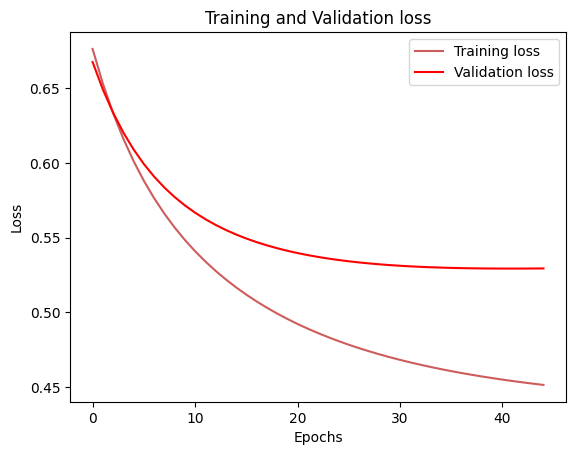

In [365]:

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

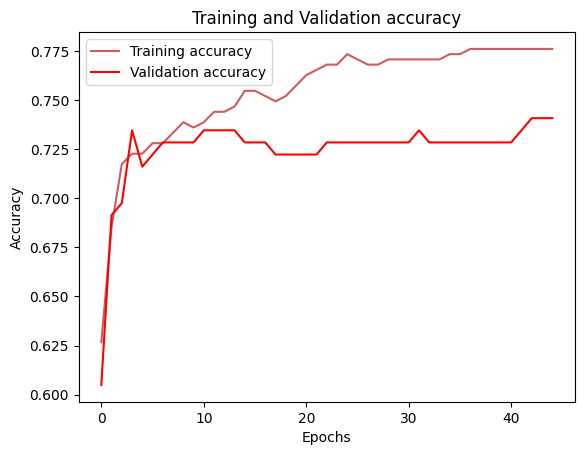

In [366]:
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [367]:
# Predicting the test set results
y_pred = model.predict(x_test)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)


test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       147
           1       0.69      0.73      0.71        84

    accuracy                           0.78       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.78      0.78       231

AUC: 0.767857
The mean squared error (MSE) for the test data set is: [0.45844829082489014, 0.7965368032455444]


[[119  28]
 [ 23  61]]

 normalised confusion matrix ANN:  
 [[0.80952381 0.19047619]
 [0.27380952 0.72619048]]


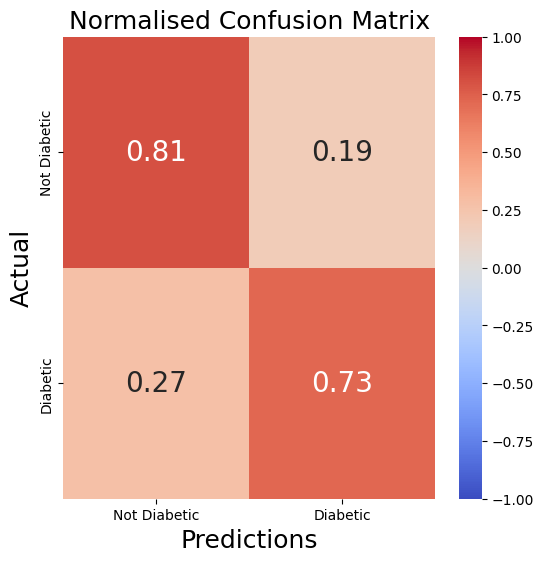

In [368]:

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

In [369]:
# Generate x_test table with y_test and y_pred results

y_test_table = pd.DataFrame(y_test)
y_test_table.columns = ["Actual"]
print("y_test_oldindex","\n",y_test_table.head())
y_test_table.reset_index(inplace=True)
print("y_test reset index","\n",y_test_table.head())
pred_table = pd.DataFrame(y_pred)
pred_table.columns = ["Predicted"]
x_test_table = pd.DataFrame(x_test)
x_test_table.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
comp_res_table = x_test_table.copy()
comp_res_table["Orig_index"] = y_test_table["index"]
comp_res_table["Actual"] = y_test_table["Actual"]
comp_res_table["Predicted"] = pred_table["Predicted"]
comp_res_table

y_test_oldindex 
      Actual
642       1
695       1
453       0
565       0
99        1
y_test reset index 
    index  Actual
0    642       1
1    695       1
2    453       0
3    565       0
4     99       1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Orig_index,Actual,Predicted
0,0.805313,0.871933,0.606709,0.128483,0.034198,-0.371107,-0.994129,1.404306,642,1,1
1,0.978106,0.706086,1.448428,-0.491112,2.795268,-0.227688,-1.209270,0.938205,695,1,1
2,-0.291117,-0.056811,-0.032561,0.128483,0.034198,-2.306470,1.196322,2.536546,453,0,0
3,-0.291117,-0.852877,-1.581761,-2.227084,-0.682348,-0.953995,0.963502,-1.109786,565,0,0
4,-0.815802,0.042697,1.448428,1.997741,1.192312,2.135164,-0.410817,-0.067183,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...
226,1.791546,1.800676,-0.908386,0.239915,0.034198,0.250910,-0.852988,0.557371,455,1,1
227,0.081152,-1.018724,0.438365,0.128483,0.034198,1.402428,0.395898,-1.250125,354,0,0
228,0.605837,-0.388505,-0.908386,1.271938,0.098613,0.554919,0.250612,-0.722719,216,1,0
229,1.130521,-0.023642,0.438365,0.128483,0.034198,-1.158350,-0.105914,2.170095,509,0,0


# 3.3.5 NN Summary part 1

<img src="https://github.com/Ddbol/Neural_network_Diabetes_classif/blob/main/Comparing_neural_networks1.PNG?raw=true" alt="drawing" width="1500"/>

- 3 hidden layer model:
    - Early stopping rather than fixed number of epochs, avoids overtraining of the non-diabetic (0) data that is in higher proportion versus diabetic (1) data. This improves AUC score.
- 1 hidden layer/binary preceptron models with early stop:
    - rerun several times to compare epochs run and resultant AUC - relatively consistent run to run, indicating model is robust on this dataset. 
        - Ideally would run for 30+ and do stats on results
    - simpler models giving comparable data with 1 hidden layer tending towards slightly higher AUCs (0.761-0.773) versus binary preceptron (0.759-0,768)

# 3.3.6 Force consistent output -   1 hidden layer [8 - (16) - 1] early stop

Force random seed on 1 hidden layer model to force consistent output for visualisation of classification.

In [371]:
## Neural Network
#Sets all random seeds (Python, NumPy, and backend framework, e.g. TF).
tf.keras.utils.set_random_seed(3)

## Neural Network

# try 1 hidden layer with input layer *2
inp_eles = X.shape[1]
hl1_unit = 2*inp_eles
print("Input elements:",inp_eles," Hidden elements layer 1: ",hl1_unit)

## initialise the NN
model = Sequential()

##set up the input/visible layers - 1D array 
model.add(Input(shape=(inp_eles,)))

# add hidden layer 1
model.add(Dense(units = hl1_unit, kernel_initializer= 'uniform', activation='relu'))
# add output layer
model.add(Dense(units = 1, kernel_initializer= 'uniform', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

# Fit the model with the EarlyStopping callback
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_split=0.3, callbacks=[early_stopping])


Input elements: 8  Hidden elements layer 1:  16
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5914 - loss: 0.6892 - val_accuracy: 0.6235 - val_loss: 0.6781
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 0.6697 - val_accuracy: 0.6173 - val_loss: 0.6514
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6883 - loss: 0.6354 - val_accuracy: 0.7037 - val_loss: 0.6140
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7687 - loss: 0.5899 - val_accuracy: 0.7037 - val_loss: 0.5773
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7853 - loss: 0.5444 - val_accuracy: 0.7407 - val_loss: 0.5498
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7665 - loss: 0.5067 - val_accuracy: 0.7346 - val_loss: 0.5333
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7899 - loss: 0.4787 - val_accuracy: 0.7346 - val_loss: 0.5248
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7933

In [372]:
model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485 (1.90 KB)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 324 (1.27 KB)

In [373]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)


val_accuracy is: 71.46%


,accuracy,loss,val_accuracy,val_loss
0,0.650667,0.684939,0.623457,0.678102
1,0.672000,0.661096,0.617284,0.651407
2,0.720000,0.622114,0.703704,0.614018
3,0.768000,0.575870,0.703704,0.577273
4,0.778667,0.533971,0.740741,0.549822
5,0.762667,0.502169,0.734568,0.533297
6,0.776000,0.479927,0.734568,0.524809
7,0.778667,0.464558,0.740741,0.521195
8,0.778667,0.453871,0.734568,0.520044
9,0.781333,0.446309,0.740741,0.520015


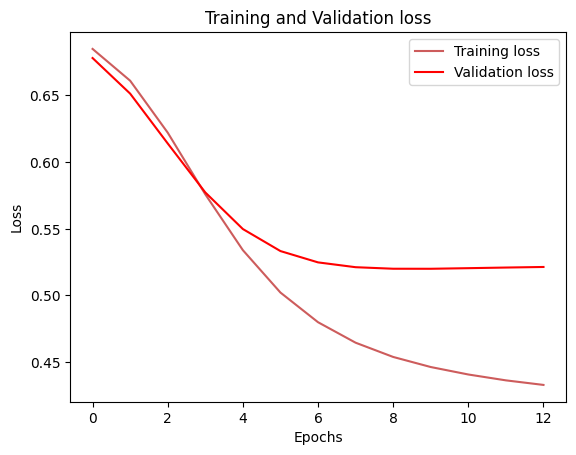

In [374]:

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

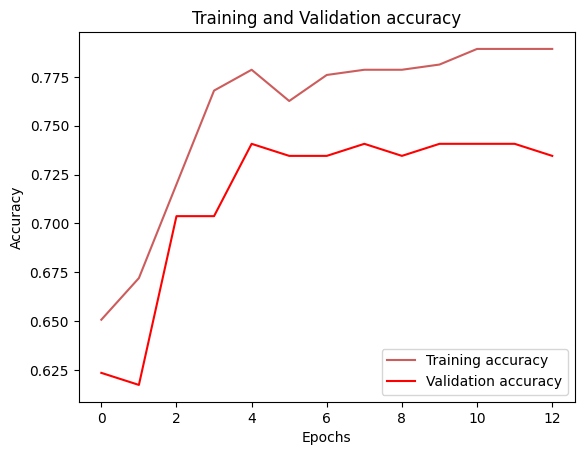

In [375]:
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [376]:
# Predicting the test set results
y_pred = model.predict(x_test)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test, y_pred)
print('AUC: %f' %auc)

test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       147
           1       0.67      0.74      0.70        84

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231

AUC: 0.767007
The mean squared error (MSE) for the test data set is: [0.45921576023101807, 0.7922077775001526]


[[117  30]
 [ 22  62]]

 normalised confusion matrix ANN:  
 [[0.79591837 0.20408163]
 [0.26190476 0.73809524]]


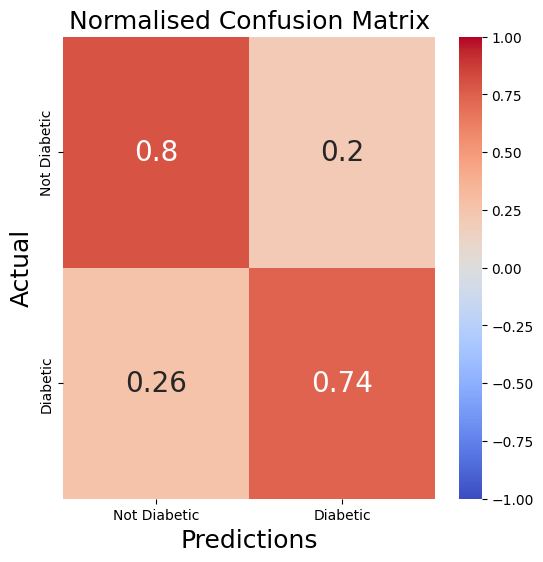

In [377]:

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

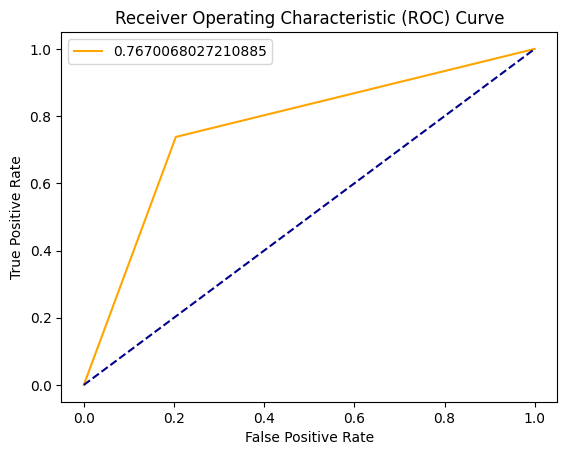

In [378]:
# use underscore to skip a varaible and stop errors - in this case not setting a treshold e.g. could maybe do x_train, x_test but might not work

fpr, tpr, _ = roc_curve(y_test,y_pred)

plt.plot(fpr, tpr, color='orange', label=auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [379]:
# checking treshold as left if out above - show that using default 0 and 1
fpr, tpr, tresholds = roc_curve(y_test, y_pred)

for i in range (len(tresholds)):
    print(f'"Threshold: {tresholds[i]: .3f}, TPR: {tpr[i]: .3f}, FPR: {fpr[i]: .3f}')

"Threshold:  inf, TPR:  0.000, FPR:  0.000
"Threshold:  1.000, TPR:  0.738, FPR:  0.204
"Threshold:  0.000, TPR:  1.000, FPR:  1.000


In [380]:
# Generate x_test table with y_test and y_pred results

y_test_table = pd.DataFrame(y_test)
y_test_table.columns = ["Actual"]
print("y_test_oldindex","\n",y_test_table.head())
y_test_table.reset_index(inplace=True)
print("y_test reset index","\n",y_test_table.head())
pred_table = pd.DataFrame(y_pred)
pred_table.columns = ["Predicted"]
x_test_table = pd.DataFrame(x_test)
x_test_table.columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
comp_res_table = x_test_table.copy()
comp_res_table["Orig_index"] = y_test_table["index"]
comp_res_table["Actual"] = y_test_table["Actual"]
comp_res_table["Predicted"] = pred_table["Predicted"]
comp_res_table


y_test_oldindex 
      Actual
642       1
695       1
453       0
565       0
99        1
y_test reset index 
    index  Actual
0    642       1
1    695       1
2    453       0
3    565       0
4     99       1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Orig_index,Actual,Predicted
0,0.805313,0.871933,0.606709,0.128483,0.034198,-0.371107,-0.994129,1.404306,642,1,1
1,0.978106,0.706086,1.448428,-0.491112,2.795268,-0.227688,-1.209270,0.938205,695,1,1
2,-0.291117,-0.056811,-0.032561,0.128483,0.034198,-2.306470,1.196322,2.536546,453,0,0
3,-0.291117,-0.852877,-1.581761,-2.227084,-0.682348,-0.953995,0.963502,-1.109786,565,0,0
4,-0.815802,0.042697,1.448428,1.997741,1.192312,2.135164,-0.410817,-0.067183,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...
226,1.791546,1.800676,-0.908386,0.239915,0.034198,0.250910,-0.852988,0.557371,455,1,1
227,0.081152,-1.018724,0.438365,0.128483,0.034198,1.402428,0.395898,-1.250125,354,0,0
228,0.605837,-0.388505,-0.908386,1.271938,0.098613,0.554919,0.250612,-0.722719,216,1,0
229,1.130521,-0.023642,0.438365,0.128483,0.034198,-1.158350,-0.105914,2.170095,509,0,0


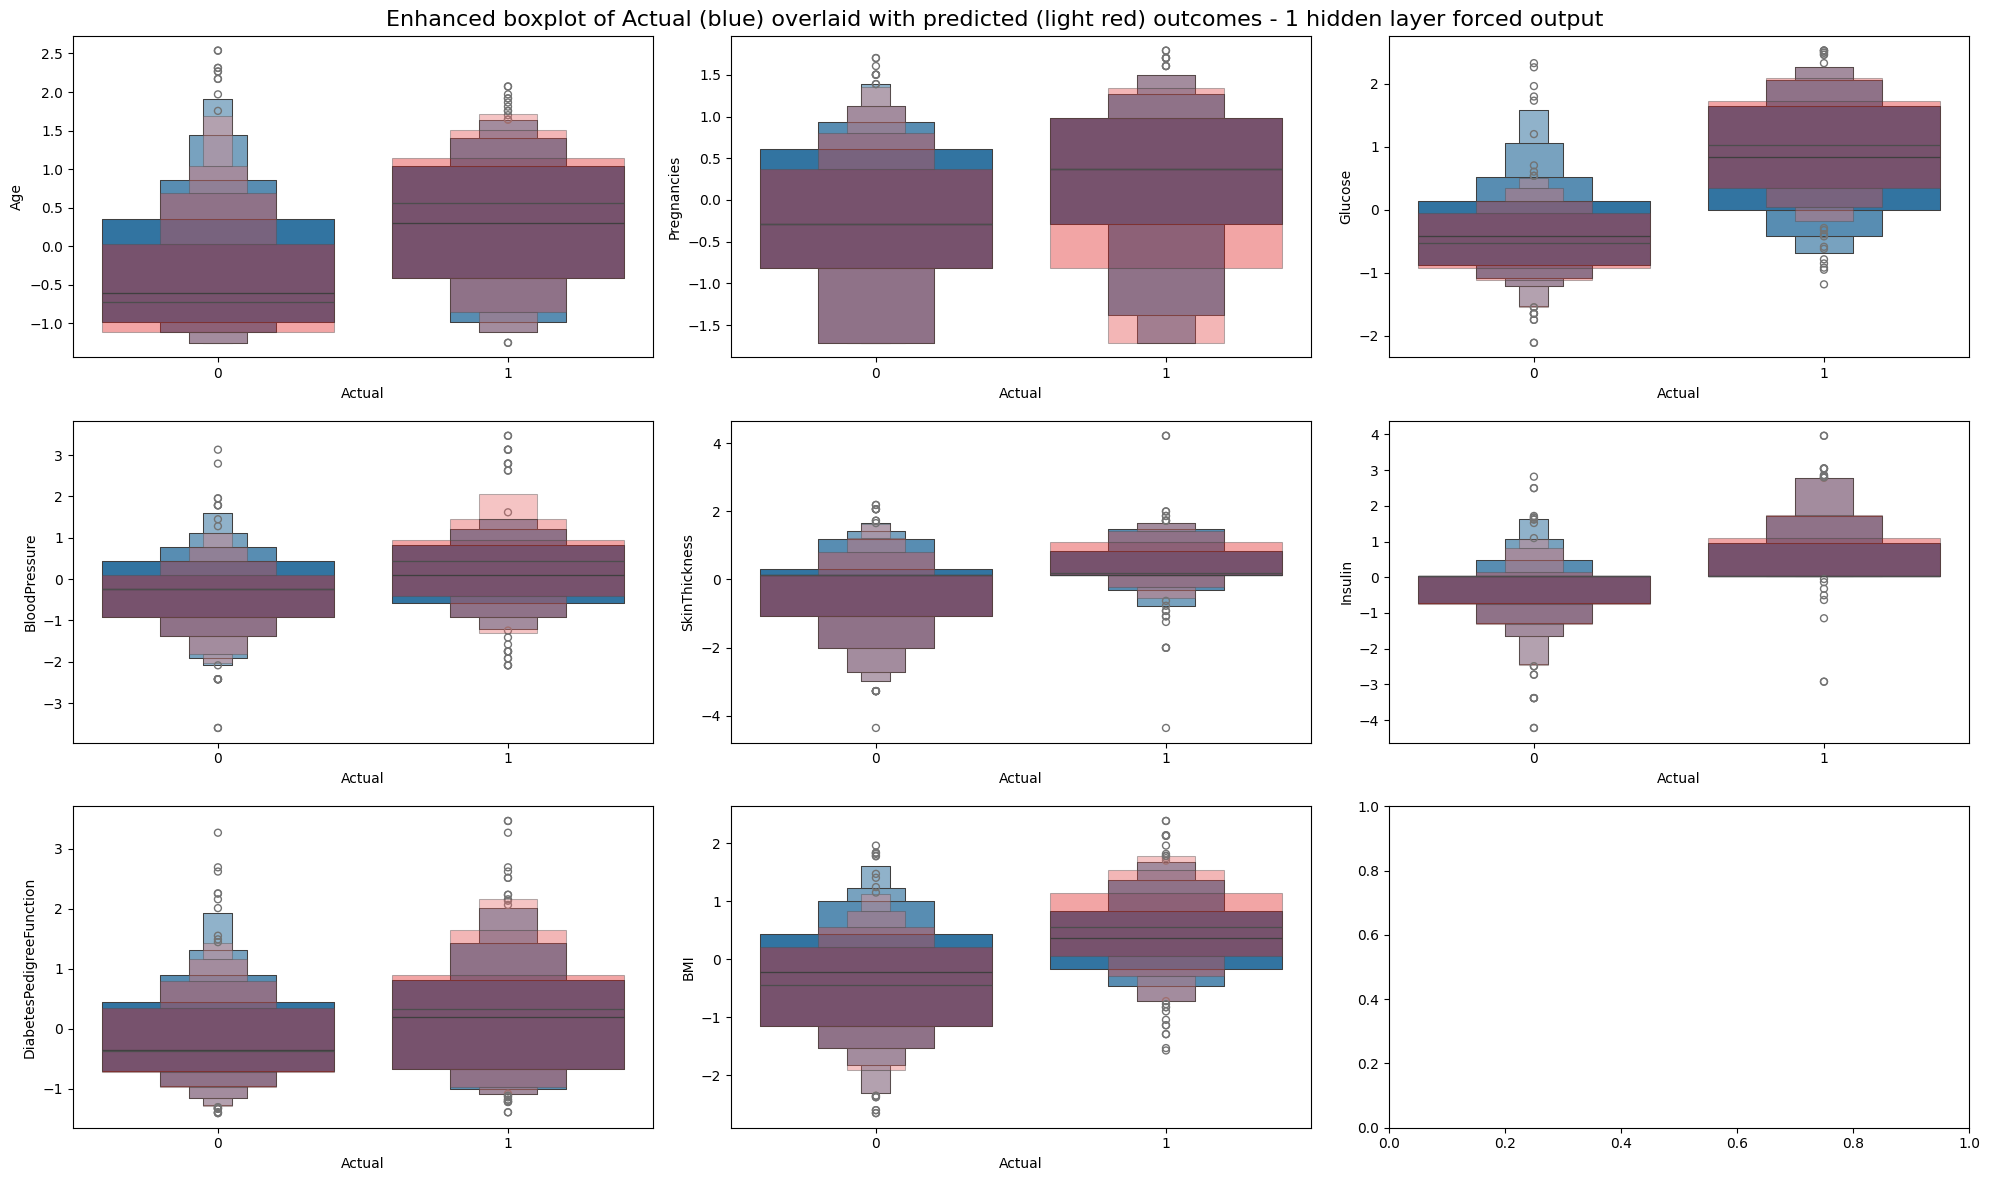

In [381]:

# Swarmplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(3, 3, figsize=(20, 12))  # Increased figure size for more room

sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Actual"], y=comp_res_table["Age"])
sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Predicted"], y=comp_res_table["Age"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Actual"], y=comp_res_table["Pregnancies"])
sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Predicted"], y=comp_res_table["Pregnancies"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Actual"], y=comp_res_table["Glucose"])
sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Predicted"], y=comp_res_table["Glucose"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Actual"], y=comp_res_table["BloodPressure"])
sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Predicted"], y=comp_res_table["BloodPressure"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Actual"], y=comp_res_table["SkinThickness"])
sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Predicted"], y=comp_res_table["SkinThickness"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Actual"], y=comp_res_table["Insulin"])
sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Predicted"], y=comp_res_table["Insulin"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Actual"], y=comp_res_table["BMI"])
sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Predicted"], y=comp_res_table["BMI"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Actual"], y=comp_res_table["DiabetesPedigreeFunction"])
sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Predicted"], y=comp_res_table["DiabetesPedigreeFunction"],color="red", alpha=0.4)

plt.suptitle('Enhanced boxplot of Actual (blue) overlaid with predicted (light red) outcomes - 1 hidden layer forced output', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

Predicted/overlay tends to be lower on non-dabetic (0) outcome and higher on diabetic (1) outcome, as expected. Pregnancy is the only feature that doesn't tend this way and the diabetic (1) outcome has predicted falling into lower half also.

In [382]:
## save the ann model
# 2 modes of saving
model.save('diabetes.keras')
keras.saving.save_model(model,"diabetes.keras")


In [383]:
dataset_log

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.945910,148.0,72.0,3.583519,4.836282,3.543854,0.486738,3.931826,1
1,0.693147,85.0,66.0,3.401197,4.836282,3.317816,0.300845,3.465736,0
2,2.197225,183.0,64.0,3.401197,4.836282,3.190476,0.514021,3.496508,1
3,0.693147,89.0,66.0,3.178054,4.553877,3.370738,0.154436,3.091042,0
4,0.000000,137.0,40.0,3.583519,5.129899,3.786460,1.190279,3.526361,1
...,...,...,...,...,...,...,...,...,...
763,2.397895,101.0,76.0,3.891820,5.198497,3.523415,0.157858,4.158883,0
764,1.098612,122.0,70.0,3.332205,4.836282,3.632309,0.292670,3.332205,0
765,1.791759,121.0,72.0,3.178054,4.727388,3.303217,0.219136,3.433987,0
766,0.693147,126.0,60.0,3.401197,4.836282,3.437208,0.299364,3.871201,1




# 3.3.6.1 Remove preg (force consistent output) -   1 hidden layer [8 - (16) - 1] early stop

Drop pregnancies due to slightly different behaviour of this feature in predicted results and review the affects.

In [ ]:
# drop pregnancies 
## independednt and dependent variable
dataset_nopreg = dataset_log.drop(columns = "Pregnancies")

X_nopreg = dataset_nopreg.iloc[:, :-1]
y_nopreg = dataset_nopreg.iloc[:, -1]

## split our dataset
x_train_nopreg, x_test_nopreg, y_train_nopreg, y_test_nopreg = train_test_split(X_nopreg, y, test_size= 0.30, random_state= 32)

## feature scaling 
sc = StandardScaler()
x_train_nopreg =sc.fit_transform(x_train_nopreg)
x_test_nopreg = sc.transform(x_test_nopreg)

dataset_nopreg

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,3.583519,4.836282,3.543854,0.486738,3.931826,1
1,85.0,66.0,3.401197,4.836282,3.317816,0.300845,3.465736,0
2,183.0,64.0,3.401197,4.836282,3.190476,0.514021,3.496508,1
3,89.0,66.0,3.178054,4.553877,3.370738,0.154436,3.091042,0
4,137.0,40.0,3.583519,5.129899,3.786460,1.190279,3.526361,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,3.891820,5.198497,3.523415,0.157858,4.158883,0
764,122.0,70.0,3.332205,4.836282,3.632309,0.292670,3.332205,0
765,121.0,72.0,3.178054,4.727388,3.303217,0.219136,3.433987,0
766,126.0,60.0,3.401197,4.836282,3.437208,0.299364,3.871201,1


In [385]:
## Neural Network
#Sets all random seeds (Python, NumPy, and backend framework, e.g. TF).
tf.keras.utils.set_random_seed(3)

## Neural Network

# try 1 hidden layer with input layer *2
inp_eles = X_nopreg.shape[1]
hl1_unit = 2*inp_eles
print("Input elements:",inp_eles," Hidden elements layer 1: ",hl1_unit)

## initialise the NN
model = Sequential()

##set up the input/visible layers - 1D array 
model.add(Input(shape=(inp_eles,)))

# add hidden layer 1
model.add(Dense(units = hl1_unit, kernel_initializer= 'uniform', activation='relu'))
# add output layer
model.add(Dense(units = 1, kernel_initializer= 'uniform', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

# Fit the model with the EarlyStopping callback
history = model.fit(x_train_nopreg, y_train_nopreg, epochs=50, batch_size=10, validation_split=0.3, callbacks=[early_stopping])


Input elements: 7  Hidden elements layer 1:  14
Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6450 - loss: 0.6893 - val_accuracy: 0.6235 - val_loss: 0.6806
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 0.6709 - val_accuracy: 0.6235 - val_loss: 0.6529
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6480 - loss: 0.6343 - val_accuracy: 0.6235 - val_loss: 0.6113
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6528 - loss: 0.5858 - val_accuracy: 0.6481 - val_loss: 0.5733
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7279 - loss: 0.5419 - val_accuracy: 0.6790 - val_loss: 0.5475
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7830 - loss: 0.5084 - val_accuracy: 0.6914 - val_loss: 0.5317
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7916 - loss: 0.4835 - val_accuracy: 0.7160 - val_loss: 0.5223
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7881 

In [386]:
model.summary()

Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)               │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383 (1.50 KB)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256 (1.00 KB)

In [387]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))

history_df = pd.DataFrame(history.history)
history_df.tail(14)


val_accuracy is: 71.57%


,accuracy,loss,val_accuracy,val_loss
17,0.802667,0.426214,0.722222,0.509381
18,0.800000,0.424137,0.722222,0.509032
19,0.802667,0.422152,0.728395,0.508753
20,0.805333,0.420382,0.728395,0.508442
21,0.805333,0.418691,0.734568,0.508217
22,0.802667,0.417076,0.734568,0.507997
23,0.802667,0.415551,0.734568,0.507755
24,0.805333,0.414073,0.734568,0.507455
25,0.805333,0.412636,0.740741,0.507195
26,0.805333,0.411242,0.740741,0.507026


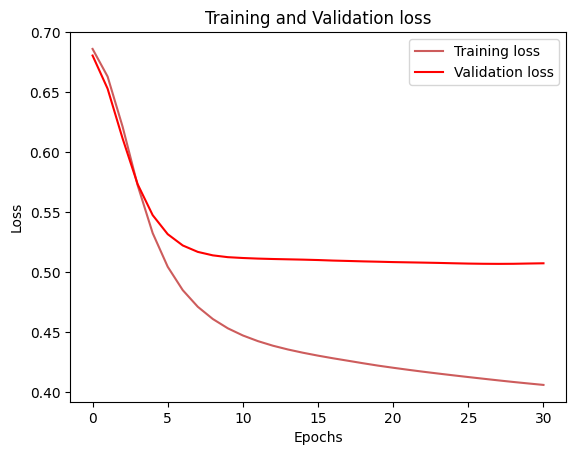

In [388]:
plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()

# see which epoch they diverge

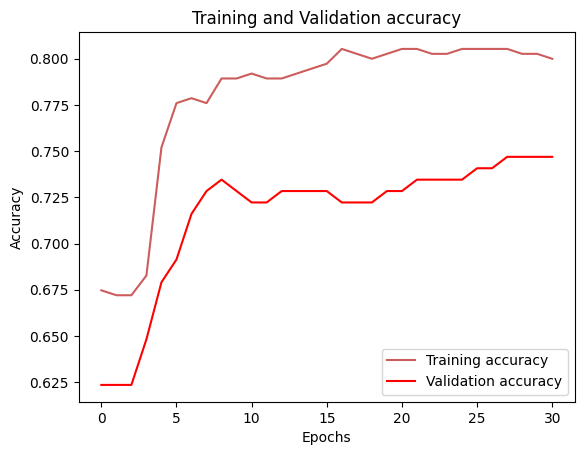

In [389]:
plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [390]:
# Predicting the test set results
y_pred = model.predict(x_test_nopreg)
# setting treshhold. if greater than 0.4 set as 1 otherwise set as 0. before set this look at your results of what network has predicted. if hasnt predicted strong number muight have to lower treshhold
y_pred = np.where(y_pred > 0.4, 1, 0)
np.set_printoptions()

print(classification_report(y_test_nopreg, y_pred))

# single score from ROC curve used to compare models
auc = roc_auc_score(y_test_nopreg, y_pred)
print('AUC: %f' %auc)

test_error_rate = model.evaluate(x_test_nopreg, y_test_nopreg, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       147
           1       0.68      0.68      0.68        84

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

AUC: 0.747449
The mean squared error (MSE) for the test data set is: [0.4871644079685211, 0.7748917937278748]


[[120  27]
 [ 27  57]]

 normalised confusion matrix ANN:  
 [[0.81632653 0.18367347]
 [0.32142857 0.67857143]]


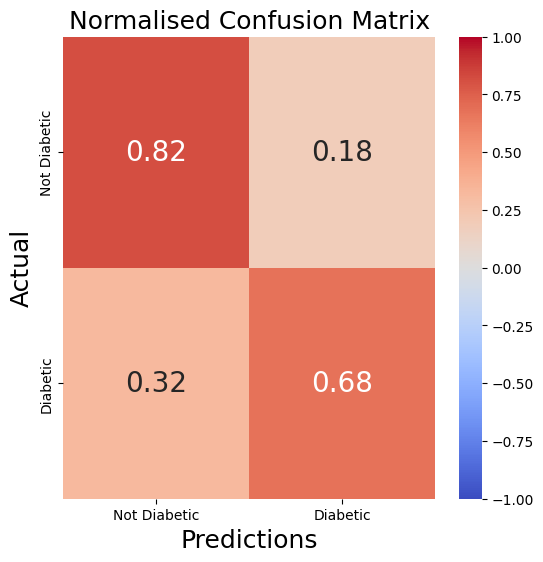

In [399]:

cf_matrix = confusion_matrix(y_test_nopreg, y_pred)
print(cf_matrix)

normed_c= cf_matrix / np.sum(cf_matrix, axis=1, keepdims=True)
print("\n","normalised confusion matrix ANN: ","\n",normed_c)

# Create labels
labels = ['Not Diabetic', 'Diabetic']

# Plot confusion matrix with custom labels
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(normed_c, 
            annot=True, 
            cmap='coolwarm',
            xticklabels=labels,
            vmin=-1, vmax=1, center=0,
            yticklabels=labels, annot_kws = {'size':20})

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual', fontsize=18)
plt.title('Normalised Confusion Matrix', fontsize=18)
plt.show()

In [392]:
# Generate x_test table with y_test and y_pred results

y_test_table = pd.DataFrame(y_test_nopreg)
y_test_table.columns = ["Actual"]
print("y_test_oldindex","\n",y_test_table.head())
y_test_table.reset_index(inplace=True)
print("y_test reset index","\n",y_test_table.head())
pred_table = pd.DataFrame(y_pred)
pred_table.columns = ["Predicted"]
x_test_table = pd.DataFrame(x_test_nopreg)
x_test_table.columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
comp_res_table = x_test_table.copy()
comp_res_table["Orig_index"] = y_test_table["index"]
comp_res_table["Actual"] = y_test_table["Actual"]
comp_res_table["Predicted"] = pred_table["Predicted"]
comp_res_table

y_test_oldindex 
      Actual
642       1
695       1
453       0
565       0
99        1
y_test reset index 
    index  Actual
0    642       1
1    695       1
2    453       0
3    565       0
4     99       1


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Orig_index,Actual,Predicted
0,0.871933,0.606709,0.128483,0.034198,-0.371107,-0.994129,1.404306,642,1,1
1,0.706086,1.448428,-0.491112,2.795268,-0.227688,-1.209270,0.938205,695,1,1
2,-0.056811,-0.032561,0.128483,0.034198,-2.306470,1.196322,2.536546,453,0,0
3,-0.852877,-1.581761,-2.227084,-0.682348,-0.953995,0.963502,-1.109786,565,0,0
4,0.042697,1.448428,1.997741,1.192312,2.135164,-0.410817,-0.067183,99,1,1
...,...,...,...,...,...,...,...,...,...,...
226,1.800676,-0.908386,0.239915,0.034198,0.250910,-0.852988,0.557371,455,1,1
227,-1.018724,0.438365,0.128483,0.034198,1.402428,0.395898,-1.250125,354,0,0
228,-0.388505,-0.908386,1.271938,0.098613,0.554919,0.250612,-0.722719,216,1,0
229,-0.023642,0.438365,0.128483,0.034198,-1.158350,-0.105914,2.170095,509,0,0


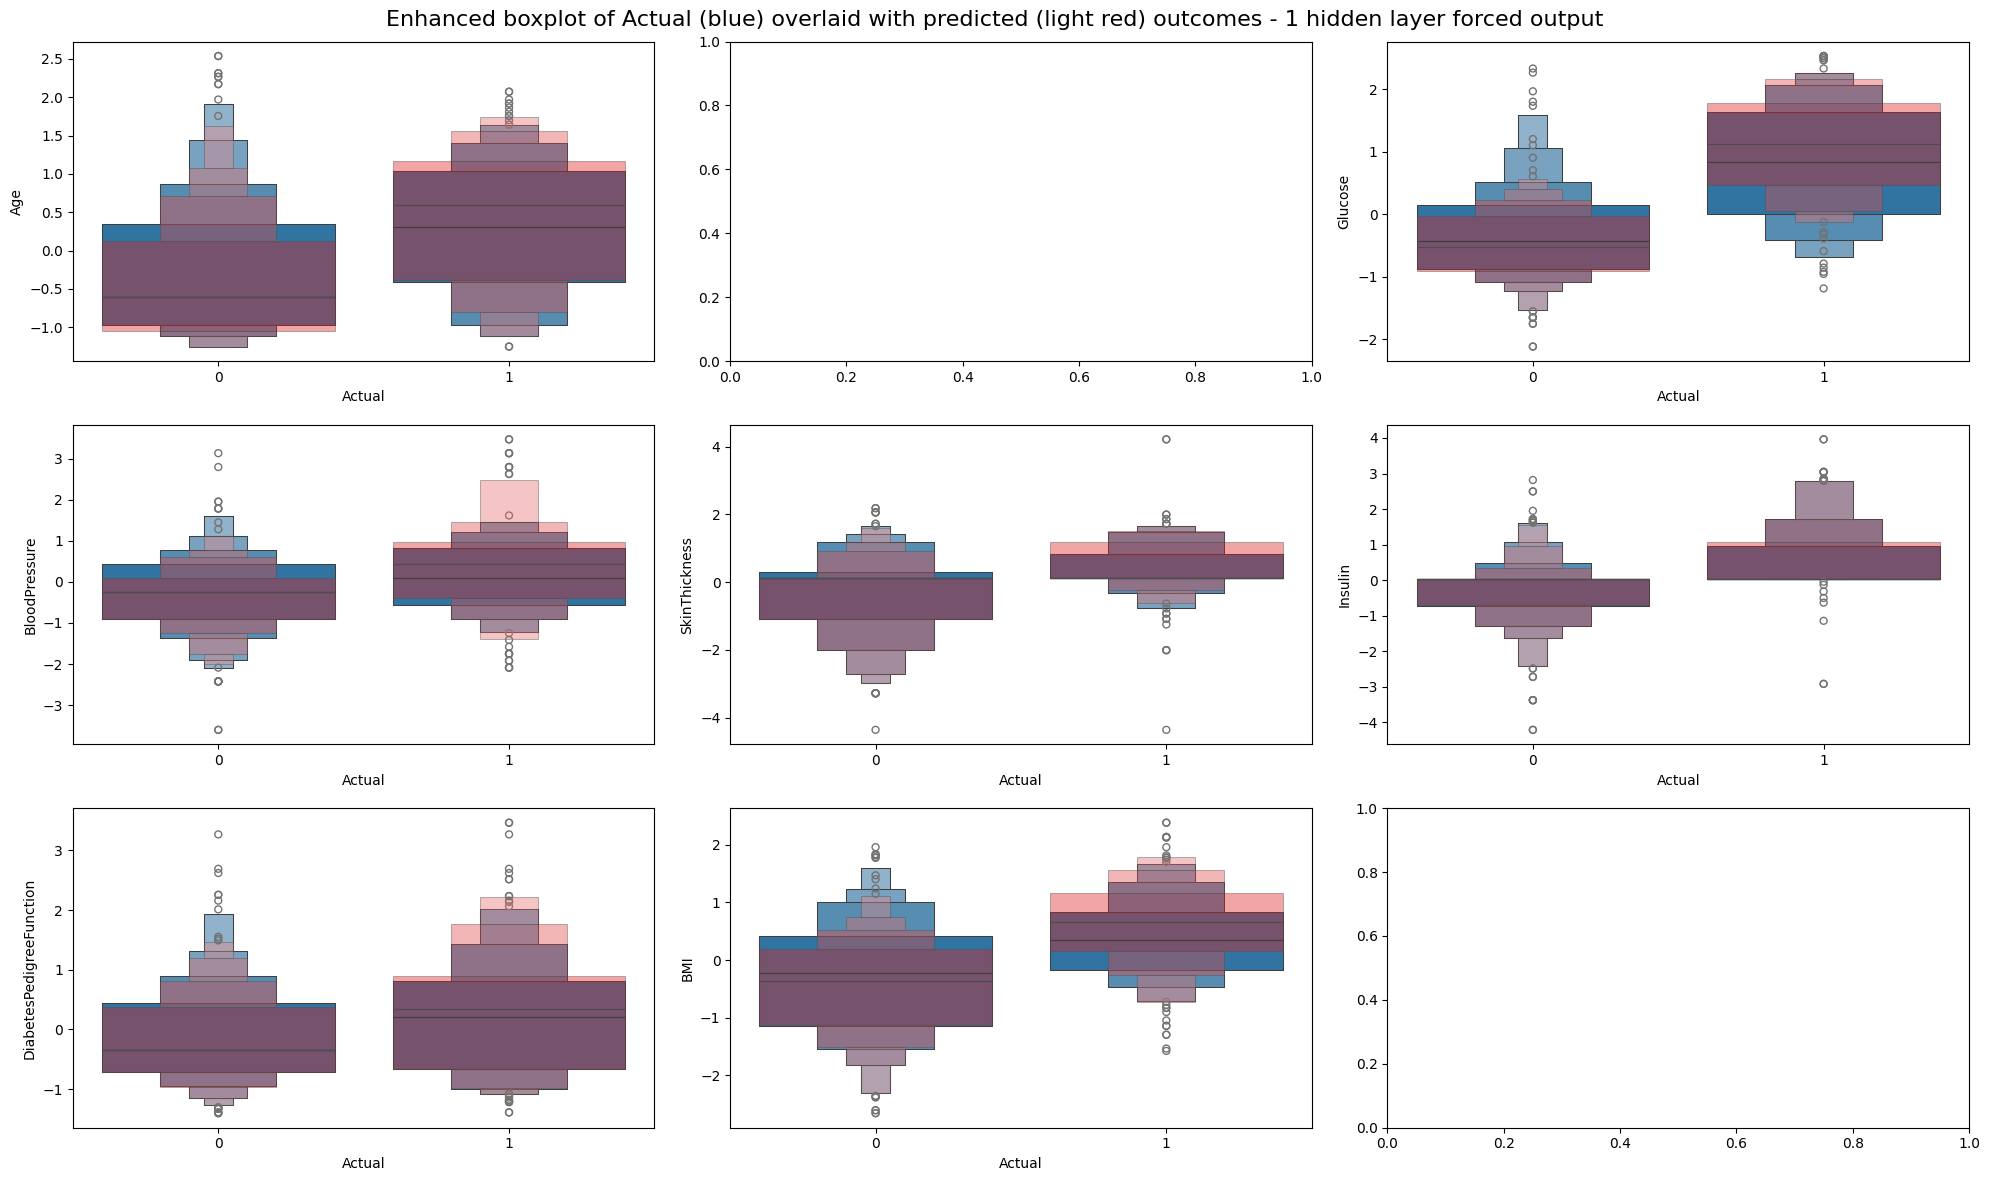

In [393]:
# Swarmplot with adjusted marker size and reduced overlap
fig, ax = plt.subplots(3, 3, figsize=(20, 12))  # Increased figure size for more room

sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Actual"], y=comp_res_table["Age"])
sns.boxenplot(ax=ax[0, 0], x=comp_res_table["Predicted"], y=comp_res_table["Age"],color="red", alpha=0.4)

# sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Actual"], y=comp_res_table["Pregnancies"])
# sns.boxenplot(ax=ax[0, 1], x=comp_res_table["Predicted"], y=comp_res_table["Pregnancies"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Actual"], y=comp_res_table["Glucose"])
sns.boxenplot(ax=ax[0, 2], x=comp_res_table["Predicted"], y=comp_res_table["Glucose"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Actual"], y=comp_res_table["BloodPressure"])
sns.boxenplot(ax=ax[1, 0], x=comp_res_table["Predicted"], y=comp_res_table["BloodPressure"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Actual"], y=comp_res_table["SkinThickness"])
sns.boxenplot(ax=ax[1, 1], x=comp_res_table["Predicted"], y=comp_res_table["SkinThickness"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Actual"], y=comp_res_table["Insulin"])
sns.boxenplot(ax=ax[1, 2], x=comp_res_table["Predicted"], y=comp_res_table["Insulin"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Actual"], y=comp_res_table["BMI"])
sns.boxenplot(ax=ax[2, 1], x=comp_res_table["Predicted"], y=comp_res_table["BMI"],color="red", alpha=0.4)

sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Actual"], y=comp_res_table["DiabetesPedigreeFunction"])
sns.boxenplot(ax=ax[2, 0], x=comp_res_table["Predicted"], y=comp_res_table["DiabetesPedigreeFunction"],color="red", alpha=0.4)

plt.suptitle('Enhanced boxplot of Actual (blue) overlaid with predicted (light red) outcomes - 1 hidden layer forced output', fontsize=16)
plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

# 3.3 NN Summary Part 2

<img src="https://github.com/Ddbol/Neural_network_Diabetes_classif/blob/main/Comparing_neural_networks2.PNG?raw=true" alt="drawing" width="1500"/>

# 4 Conclusion
- Conclusion
    - Simple neural network models with early stopping generally better prediction than linear regression/SVM
        - Takes longer time to compute for not too major an improvement
    - Prediction performance could be further improved: Best models will give 20-25% false positive or false negative
- Future work
    - Better way to handle illogical 0 data e.g. Glucose, insulin?
    - Pregnancy data appeared to improve one ANN model: 
        - More runs to confirm
        - More data on gender as there are differences in BMI and hormone regulation 
    - Tweak parameters of ANN models to improve accuracy

Note: *if generating online application user input will need to be logged for the appropriate features to fit the model 
